# Milestone 1: EDA

In [2]:
# Setup - Run only once per Kernel App
%conda install openjdk -y

# install PySpark
%pip install pyspark==3.4.0

# restart kernel
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - openjdk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.3.11  |       h06a4308_0         127 KB
    certifi-2024.2.2           |  py310h06a4308_0         159 KB
    openjdk-11.0.13            |       h87a67e3_0       341.0 MB
    ------------------------------------------------------------
                                           Total:       341.3 MB

The following NEW packages will be INSTALLED:

  openjdk            pkgs/main/linux-64::openjdk-11.0.13-h87a67e3_0 

Th

In [3]:
# Import pyspark and build Spark session
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder.appName("PySparkApp")
    .config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:3.2.2")
    .config(
        "fs.s3a.aws.credentials.provider",
        "com.amazonaws.auth.ContainerCredentialsProvider",
    )
    .getOrCreate()
)

print(spark.version)

:: loading settings :: url = jar:file:/opt/conda/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-adb82c2e-cea6-4fd3-9970-fa4451ede9d0;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.2.2 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.563 in central
:: resolution report :: resolve 388ms :: artifacts dl 33ms
	:: modules in use:
	com.amazonaws#aws-java-sdk-bundle;1.11.563 from central in [default]
	org.apache.hadoop#hadoop-aws;3.2.2 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	---------------------------------------------

3.4.0


## Load the datasets

In [4]:
%%time
import sagemaker
session = sagemaker.Session()
bucket = session.default_bucket()
output_prefix_data_comments = "finalproject/comments/yyyy=*"
s3_path = f"s3a://{bucket}/{output_prefix_data_comments}"
#s3_path = "s3a://sagemaker-us-east-1-527047370587/project/comments/yyyy=2021/425151 part-00000-28396f0a-9f66-4e79-bdee-5a0fcc71cf24-c000.snappy.parquet"
print(f"reading comments from {s3_path}")
comments = spark.read.parquet(s3_path, header=True)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
reading comments from s3a://sagemaker-us-east-1-527047370587/finalproject/comments/yyyy=*


24/04/02 04:08:28 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties


CPU times: user 2.49 s, sys: 405 ms, total: 2.89 s
Wall time: 9.75 s


In [7]:
# display a subset of columns
comments.select("subreddit", "author", "body", "parent_id", "link_id", "id", "created_utc","score").show()

+----------+--------------------+--------------------+----------+---------+-------+-------------------+-----+
| subreddit|              author|                body| parent_id|  link_id|     id|        created_utc|score|
+----------+--------------------+--------------------+----------+---------+-------+-------------------+-----+
|      news|            Sulaco99|           Why wait?|t1_gid6yr4|t3_krvwkf|gid7nhx|2021-01-07 00:22:43|    1|
|      news|  jeopardy_themesong|The tweet is gone...|t1_gicxxdr|t3_krvwkf|gid7ni1|2021-01-07 00:22:43|    1|
|      news|   West_Incident9552|You should probab...|t1_gid72ei|t3_krvwkf|gid7njz|2021-01-07 00:22:43|    4|
|      news|      StatusReality4|You wouldn't be a...|t1_gid6aea|t3_krvwkf|gid7nm5|2021-01-07 00:22:44|   14|
|      news|              5omkiy|I believe the ter...|t1_gid79xs|t3_krvwkf|gid7nmz|2021-01-07 00:22:44|    5|
|      news|      AnneONymous125|Peep the video I ...|t1_gid705n|t3_krzopk|gid7nnk|2021-01-07 00:22:44|    3|
|      new

In [5]:
%%time
output_prefix_data_submissions = f"finalproject/submissions/yyyy=*"
s3_path = f"s3a://{bucket}/{output_prefix_data_submissions}"
print(f"reading submissions from {s3_path}")
submissions = spark.read.parquet(s3_path, header=True)

reading submissions from s3a://sagemaker-us-east-1-527047370587/finalproject/submissions/yyyy=*
CPU times: user 1.28 ms, sys: 3.18 ms, total: 4.46 ms
Wall time: 1.26 s


24/04/02 04:08:38 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [10]:
# display a subset of columns
submissions.select("subreddit", "author", "title", "selftext", "created_utc", "num_comments","score").show()

+----------+--------------------+--------------------+---------+-------------------+------------+-----+
| subreddit|              author|               title| selftext|        created_utc|num_comments|score|
+----------+--------------------+--------------------+---------+-------------------+------------+-----+
|      news|           [deleted]|New Warp Drive Mo...|[deleted]|2021-03-30 10:52:37|           0|    1|
|      news|First-Situation-1384|UNICAL CES admiss...|         |2021-03-30 10:54:26|           0|    1|
|      news|             bustead|Attack on Asian W...|         |2021-03-30 10:55:12|           0|    5|
|      news|     Som2ny-Official|'Nomadland' wins ...|         |2021-03-30 10:55:50|           0|    1|
|      news|           pm30music|دانلود آهنگ کردی ...|         |2021-03-30 10:56:28|           0|    1|
|      news|    Anon-fickleflake|Ireland to promot...|         |2021-03-30 10:57:10|           0|    1|
|      news|First-Situation-1384|Newspaper Mistake...|         |

## Data Clean

In [6]:
# Filter into different subsets
news_comments = comments[comments['subreddit'] == 'news']
news_submissions = submissions[submissions['subreddit'] == 'news']

future_comments = comments[comments['subreddit'] == 'Futurology']
future_submissions = submissions[submissions['subreddit'] == 'Futurology']

technology_comments = comments[comments['subreddit'] == 'technology']
technology_submissions = submissions[submissions['subreddit'] == 'technology']

In [7]:
# Reformat dates 
import pyspark.sql.functions as F

# Reformat dates directly from UNIX timestamp
news_submissions = news_submissions.withColumn("created_date", F.date_format(F.col('created_utc'), 'yyyy-MM-dd HH:mm:ss'))
news_comments = news_comments.withColumn("created_date", F.date_format(F.col('created_utc'), 'yyyy-MM-dd HH:mm:ss'))
future_submissions = future_submissions.withColumn("created_date", F.date_format(F.col('created_utc'), 'yyyy-MM-dd HH:mm:ss'))
future_comments = future_comments.withColumn("created_date", F.date_format(F.col('created_utc'), 'yyyy-MM-dd HH:mm:ss'))
technology_submissions = technology_submissions.withColumn("created_date", F.date_format(F.col('created_utc'), 'yyyy-MM-dd HH:mm:ss'))
technology_comments = technology_comments.withColumn("created_date", F.date_format(F.col('created_utc'), 'yyyy-MM-dd HH:mm:ss'))

In [8]:
from pyspark.sql.functions import split
# Split date and time columns
news_submissions = news_submissions.withColumn("created_time", F.split(F.col('created_date'), " ")[1])
news_submissions = news_submissions.withColumn("created_date", F.split(F.col('created_date'), " ")[0])
news_comments = news_comments.withColumn("created_time", F.split(F.col('created_date'), " ")[1])
news_comments = news_comments.withColumn("created_date", F.split(F.col('created_date'), " ")[0])

future_submissions = future_submissions.withColumn("created_time", F.split(F.col('created_date'), " ")[1])
future_submissions = future_submissions.withColumn("created_date", F.split(F.col('created_date'), " ")[0])
future_comments = future_comments.withColumn("created_time", F.split(F.col('created_date'), " ")[1])
future_comments = future_comments.withColumn("created_date", F.split(F.col('created_date'), " ")[0])

technology_submissions = technology_submissions.withColumn("created_time", F.split(F.col('created_date'), " ")[1])
technology_submissions = technology_submissions.withColumn("created_date", F.split(F.col('created_date'), " ")[0])
technology_comments = technology_comments.withColumn("created_time", F.split(F.col('created_date'), " ")[1])
technology_comments = technology_comments.withColumn("created_date", F.split(F.col('created_date'), " ")[0])

## EDA
### 1. Investigating Author Contribution in the `r/technology` and `r/Futurology` Subreddits 

In our analysis, we delve into the distribution of posts by individual authors within the technology domain. Our primary objective is to discern whether a select group of authors dominates the majority of submissions and comments, or if content originates from a diverse range of contributors.

To accomplish this, we aggregate our data by author, examining whether certain individuals contribute significantly more submissions or comments compared to others. By focusing on the top contributors, we aim to understand if a few prolific authors account for a substantial portion of the total submissions and comments in the technology field, thereby elucidating the distribution of authorship within this domain.

### `r/technology`

In [32]:
from pyspark.sql.functions import *
tech_sub_author_count = technology_submissions.groupBy('author').agg(count("author").alias("subs_count")).sort(desc('subs_count'))
tech_com_author_count = technology_comments.groupBy('author').agg(count("author").alias("comments_count")).sort(desc('comments_count'))

In [11]:
tech_sub_author_count.show(10)
tech_com_author_count.show(10)

+------------------+----------+
|            author|subs_count|
+------------------+----------+
|         [deleted]|     33895|
|        groupsaada|     14461|
|           Sorin61|      2545|
|          Wagamaga|      2343|
|         arnambiar|      2026|
|     kry_some_more|      1754|
|    sagarkangude11|      1397|
|            speckz|      1337|
|Wooden_Working6842|      1229|
|     nareshkumar02|      1127|
+------------------+----------+
only showing top 10 rows



+--------------+--------------+
|        author|comments_count|
+--------------+--------------+
|     [deleted]|       1010940|
| AutoModerator|         56074|
|    veritanuda|          5334|
|  happyscrappy|          4995|
|  DarthBuzzard|          4603|
|     littleMAS|          3573|
|  AmputatorBot|          3483|
|          cryo|          3445|
|      aquarain|          3183|
|WhatTheZuck420|          3181|
+--------------+--------------+
only showing top 10 rows



In [33]:
tech_author_count = tech_sub_author_count.join(tech_com_author_count, "author")
tech_author_count = tech_author_count.na.fill(0)
tech_author_df = tech_author_count.toPandas()

In [34]:
tech_author_df = tech_author_df[tech_author_df['author'] != '[deleted]']
tech_author_df = tech_author_df.set_index('author').astype(int)
tech_author_df['total_count'] = tech_author_df['subs_count'] + tech_author_df['comments_count']
tech_author_df = tech_author_df.reset_index()

In [35]:
tech_author_df.head()

author  subs_count  comments_count  total_count
0            GD_Bats           1             493          494
1           Uhhhhh55           1              16           17
2  immersive-matthew           1              85           86
3           mrstipez           7             141          148
4    RaiderOfZeHater          19              17           36

In [36]:
tech_author_df.to_csv("Technology_Author.csv",index=False)

#### Total Count

In [43]:
total_number = tech_author_df['total_count'].sum()
print('Total Number:', total_number)
print('30% Number:', int(total_number*.3))
print('20% Number:', int(total_number* .2))

Total Number: 369359
30% Number: 110807
20% Number: 73871


In [46]:
topn_number = tech_author_df.sort_values(by='total_count', ascending=False)['total_count'][0:5].sum()
print('Top 5 Authors Number:', topn_number)

Top 5 Authors Number: 72910


In [48]:
topn_number = tech_author_df.sort_values(by='total_count', ascending=False)['total_count'][0:30].sum()
print('Top 30 Authors Number:', topn_number)

Top 30 Authors Number: 113993


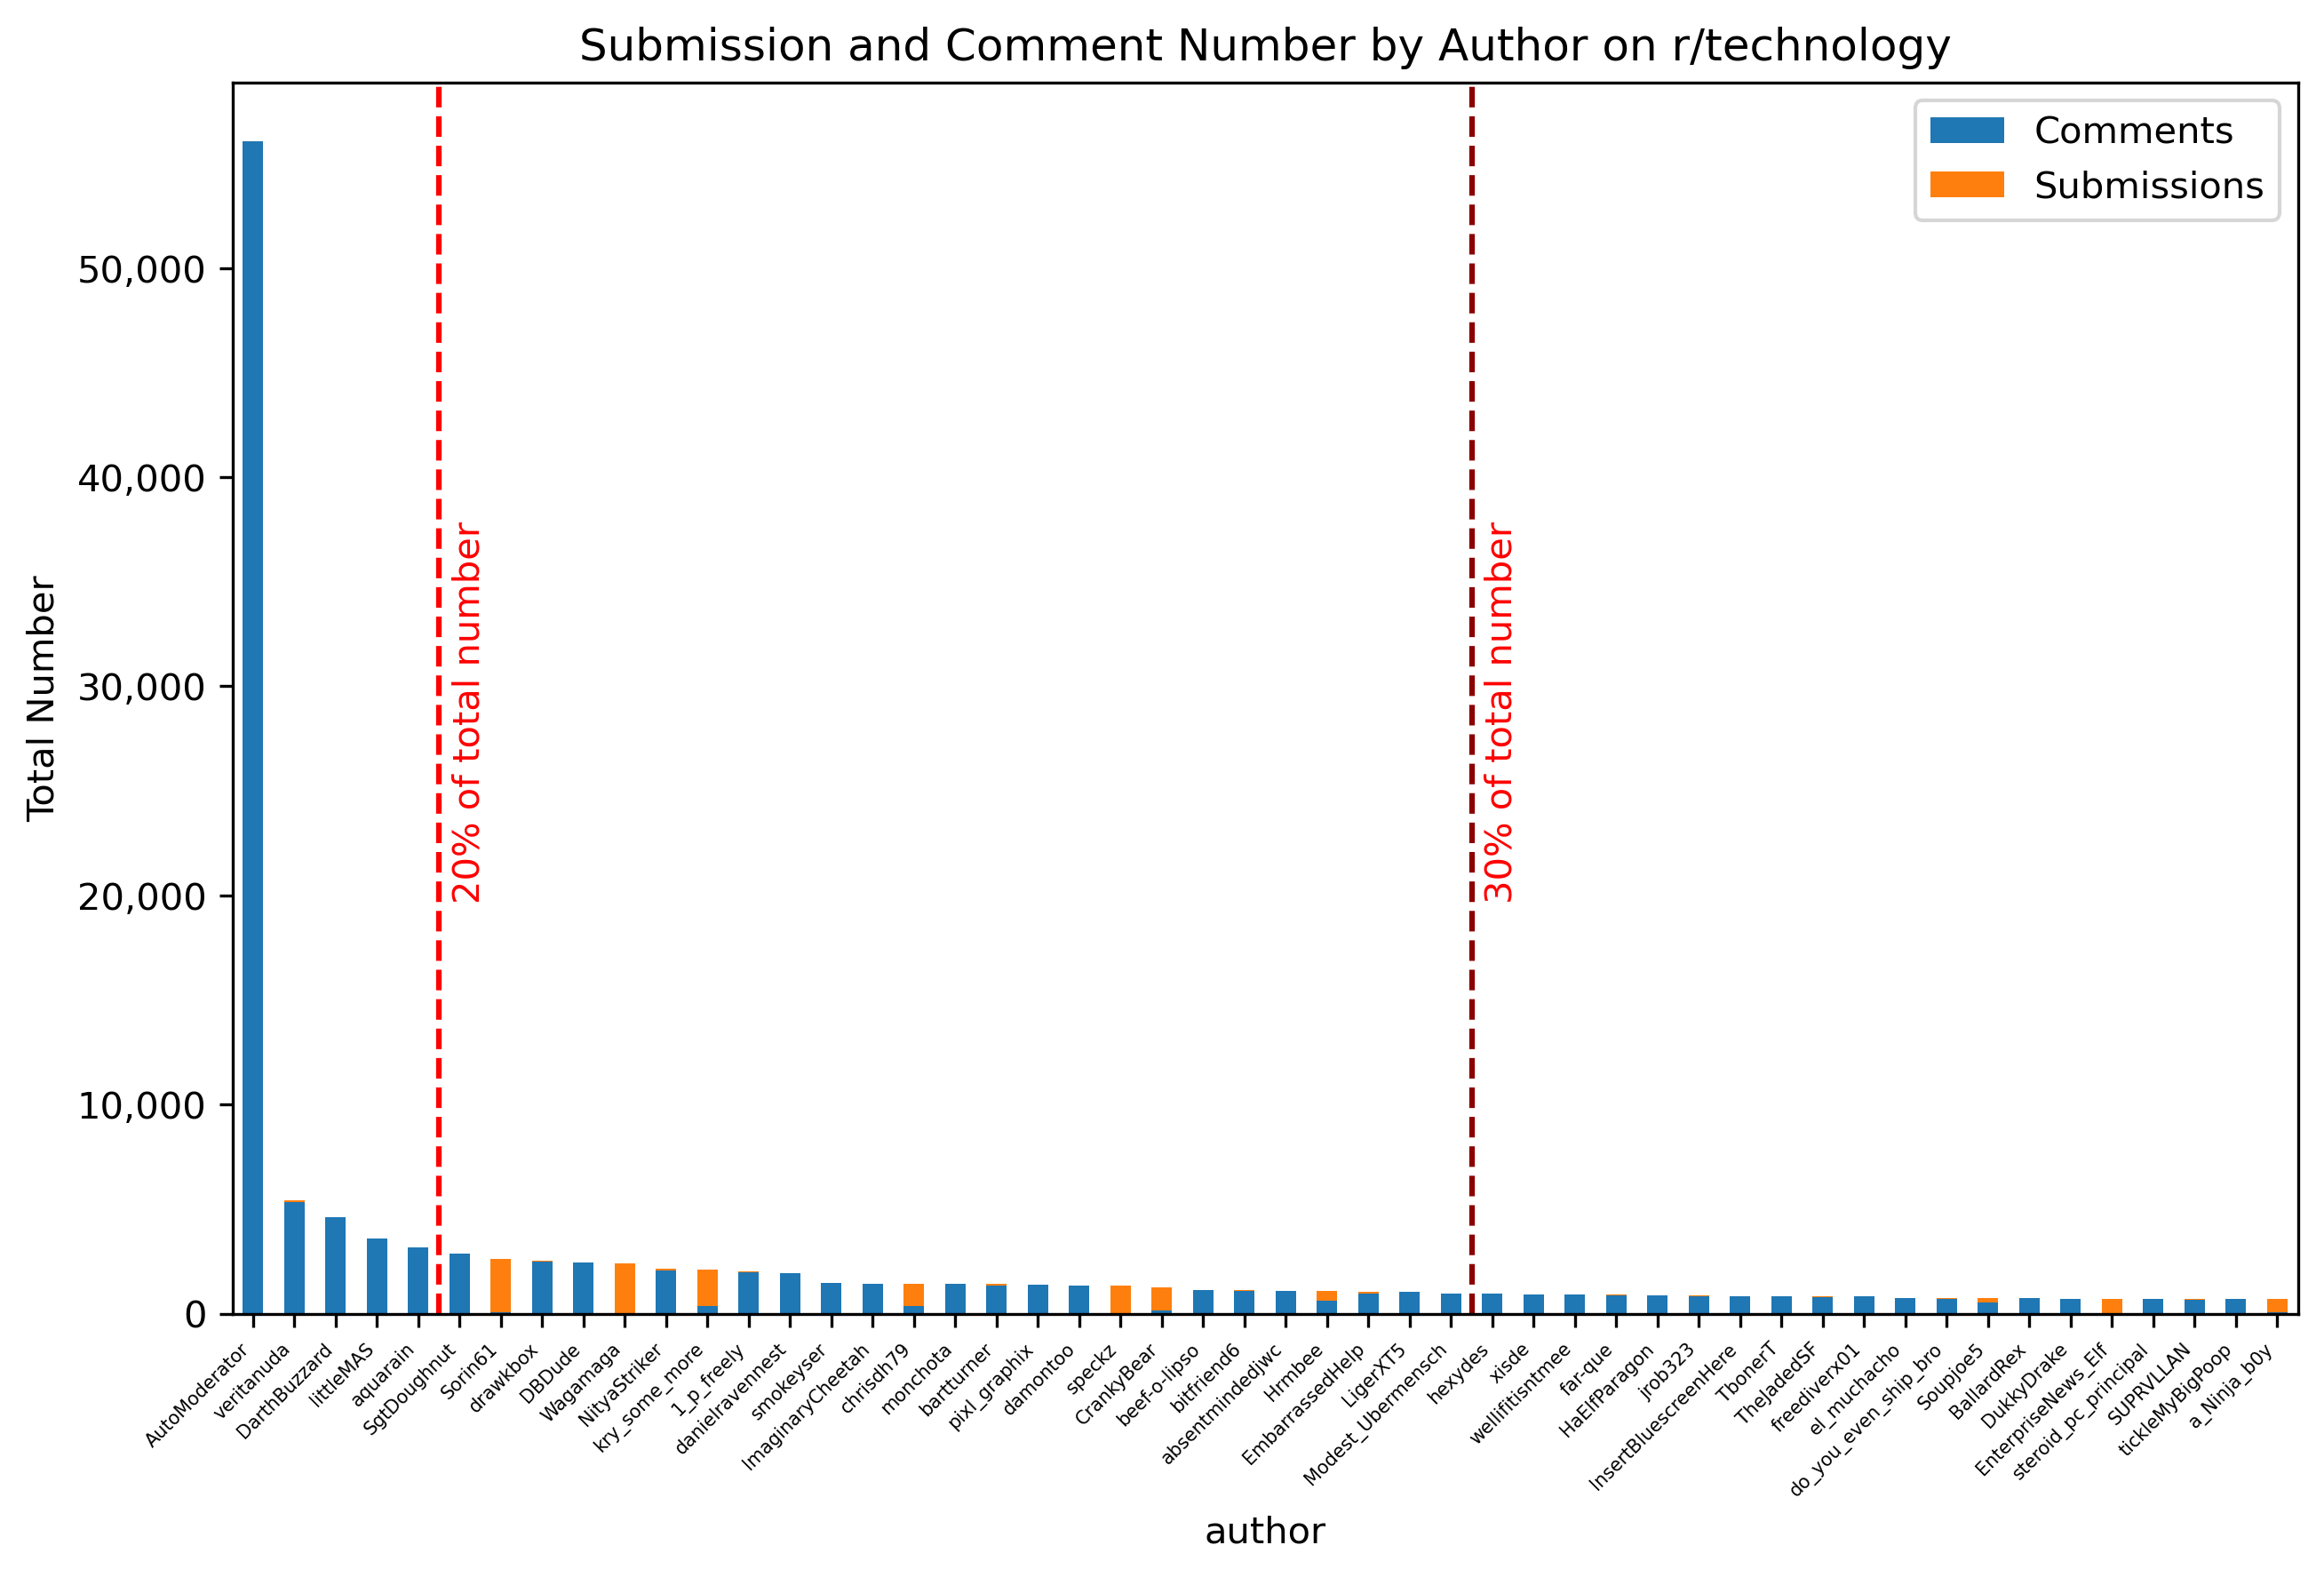

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

author_number_plot = tech_author_df.sort_values(by='total_count', ascending=False).head(50)

plt.rcParams["figure.figsize"] = (5,2)
plt.rcParams["figure.dpi"] = 300

# create a stacked bar chart
ax = author_number_plot[['author','comments_count', 'subs_count']].plot(kind='bar', stacked=True, x='author', figsize=(10, 6))
ax.set_ylabel('Total Number')


# customize the chart
plt.title('Submission and Comment Number by Author on r/technology')
plt.legend(['Comments', 'Submissions'], loc='upper right')

plt.xticks(rotation=45, fontsize=5, ha='right')

plt.axvline(x=4.5, color='red', ls='--')
ax.text(4.8, 20000, "20% of total number", color='red', rotation=90)

plt.axvline(x=29.5, color='darkred', ls='--')
ax.text(29.8, 20000, "30% of total number", color='red', rotation=90)


ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

#### Submission Count

In [75]:
total_number = tech_author_df['subs_count'].sum()
print('Total Number:', total_number)
print('38% Number:', int(total_number*.38))
print('18% Number:', int(total_number* .18))

Total Number: 50713
38% Number: 19270
18% Number: 9128


In [68]:
topn_number = tech_author_df.sort_values(by='subs_count', ascending=False)['subs_count'][0:5].sum()
print('Top 5 Authors Number:', topn_number)

Top 5 Authors Number: 9076


In [69]:
topn_number = tech_author_df.sort_values(by='subs_count', ascending=False)['subs_count'][0:30].sum()
print('Top 30 Authors Number:', topn_number)

Top 30 Authors Number: 19163


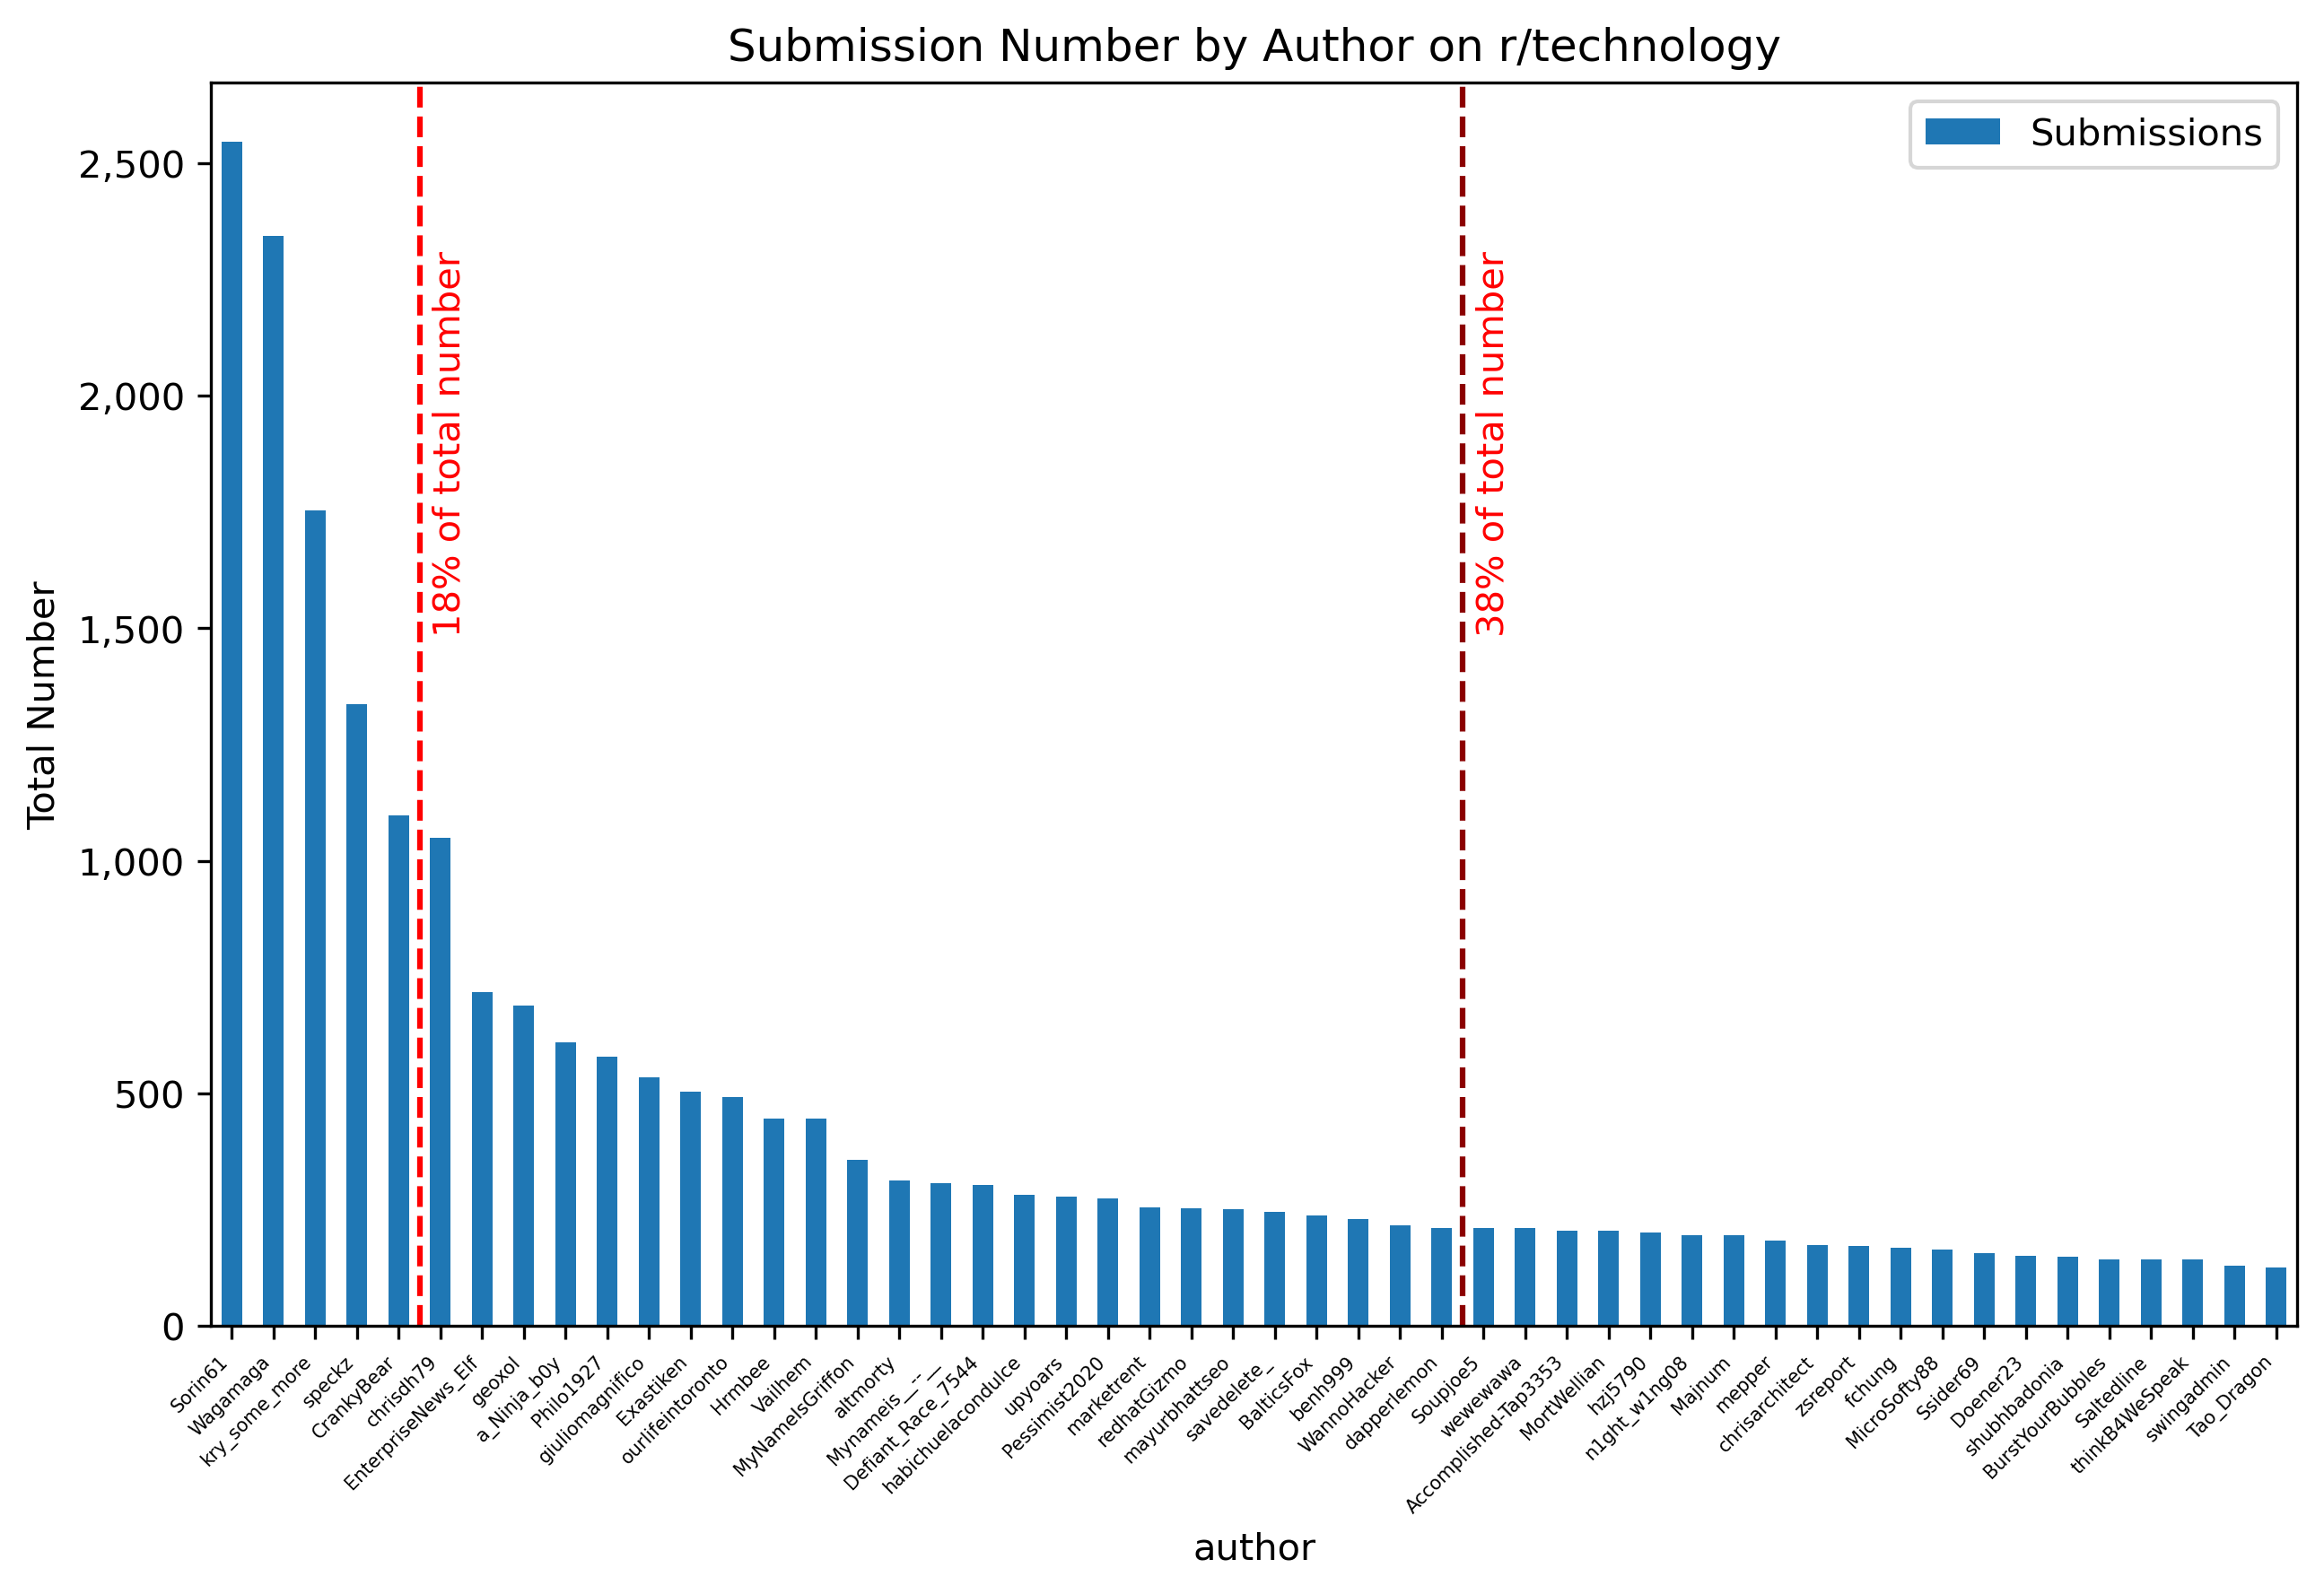

In [77]:
author_number_plot = tech_author_df.sort_values(by='subs_count', ascending=False).head(50)

plt.rcParams["figure.figsize"] = (5,2)
plt.rcParams["figure.dpi"] = 300

# create a stacked bar chart
ax = author_number_plot[['author','subs_count']].plot(kind='bar', stacked=True, x='author', figsize=(10, 6))
ax.set_ylabel('Total Number')


# customize the chart
plt.title('Submission Number by Author on r/technology')
plt.legend(['Submissions'], loc='upper right')

plt.xticks(rotation=45, fontsize=5, ha='right')

plt.axvline(x=4.5, color='red', ls='--')
ax.text(4.8, 1500, "18% of total number", color='red', rotation=90)

plt.axvline(x=29.5, color='darkred', ls='--')
ax.text(29.8, 1500, "38% of total number", color='red', rotation=90)


ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

#### Comment Count

In [78]:
total_number = tech_author_df['comments_count'].sum()
print('Total Number:', total_number)
print('34% Number:', int(total_number*.34))
print('23% Number:', int(total_number* .23))

Total Number: 318646
34% Number: 108339
23% Number: 73288


In [79]:
topn_number = tech_author_df.sort_values(by='comments_count', ascending=False)['comments_count'][0:5].sum()
print('Top 5 Authors Number:', topn_number)

Top 5 Authors Number: 72767


In [80]:
topn_number = tech_author_df.sort_values(by='comments_count', ascending=False)['comments_count'][0:30].sum()
print('Top 30 Authors Number:', topn_number)

Top 30 Authors Number: 107456


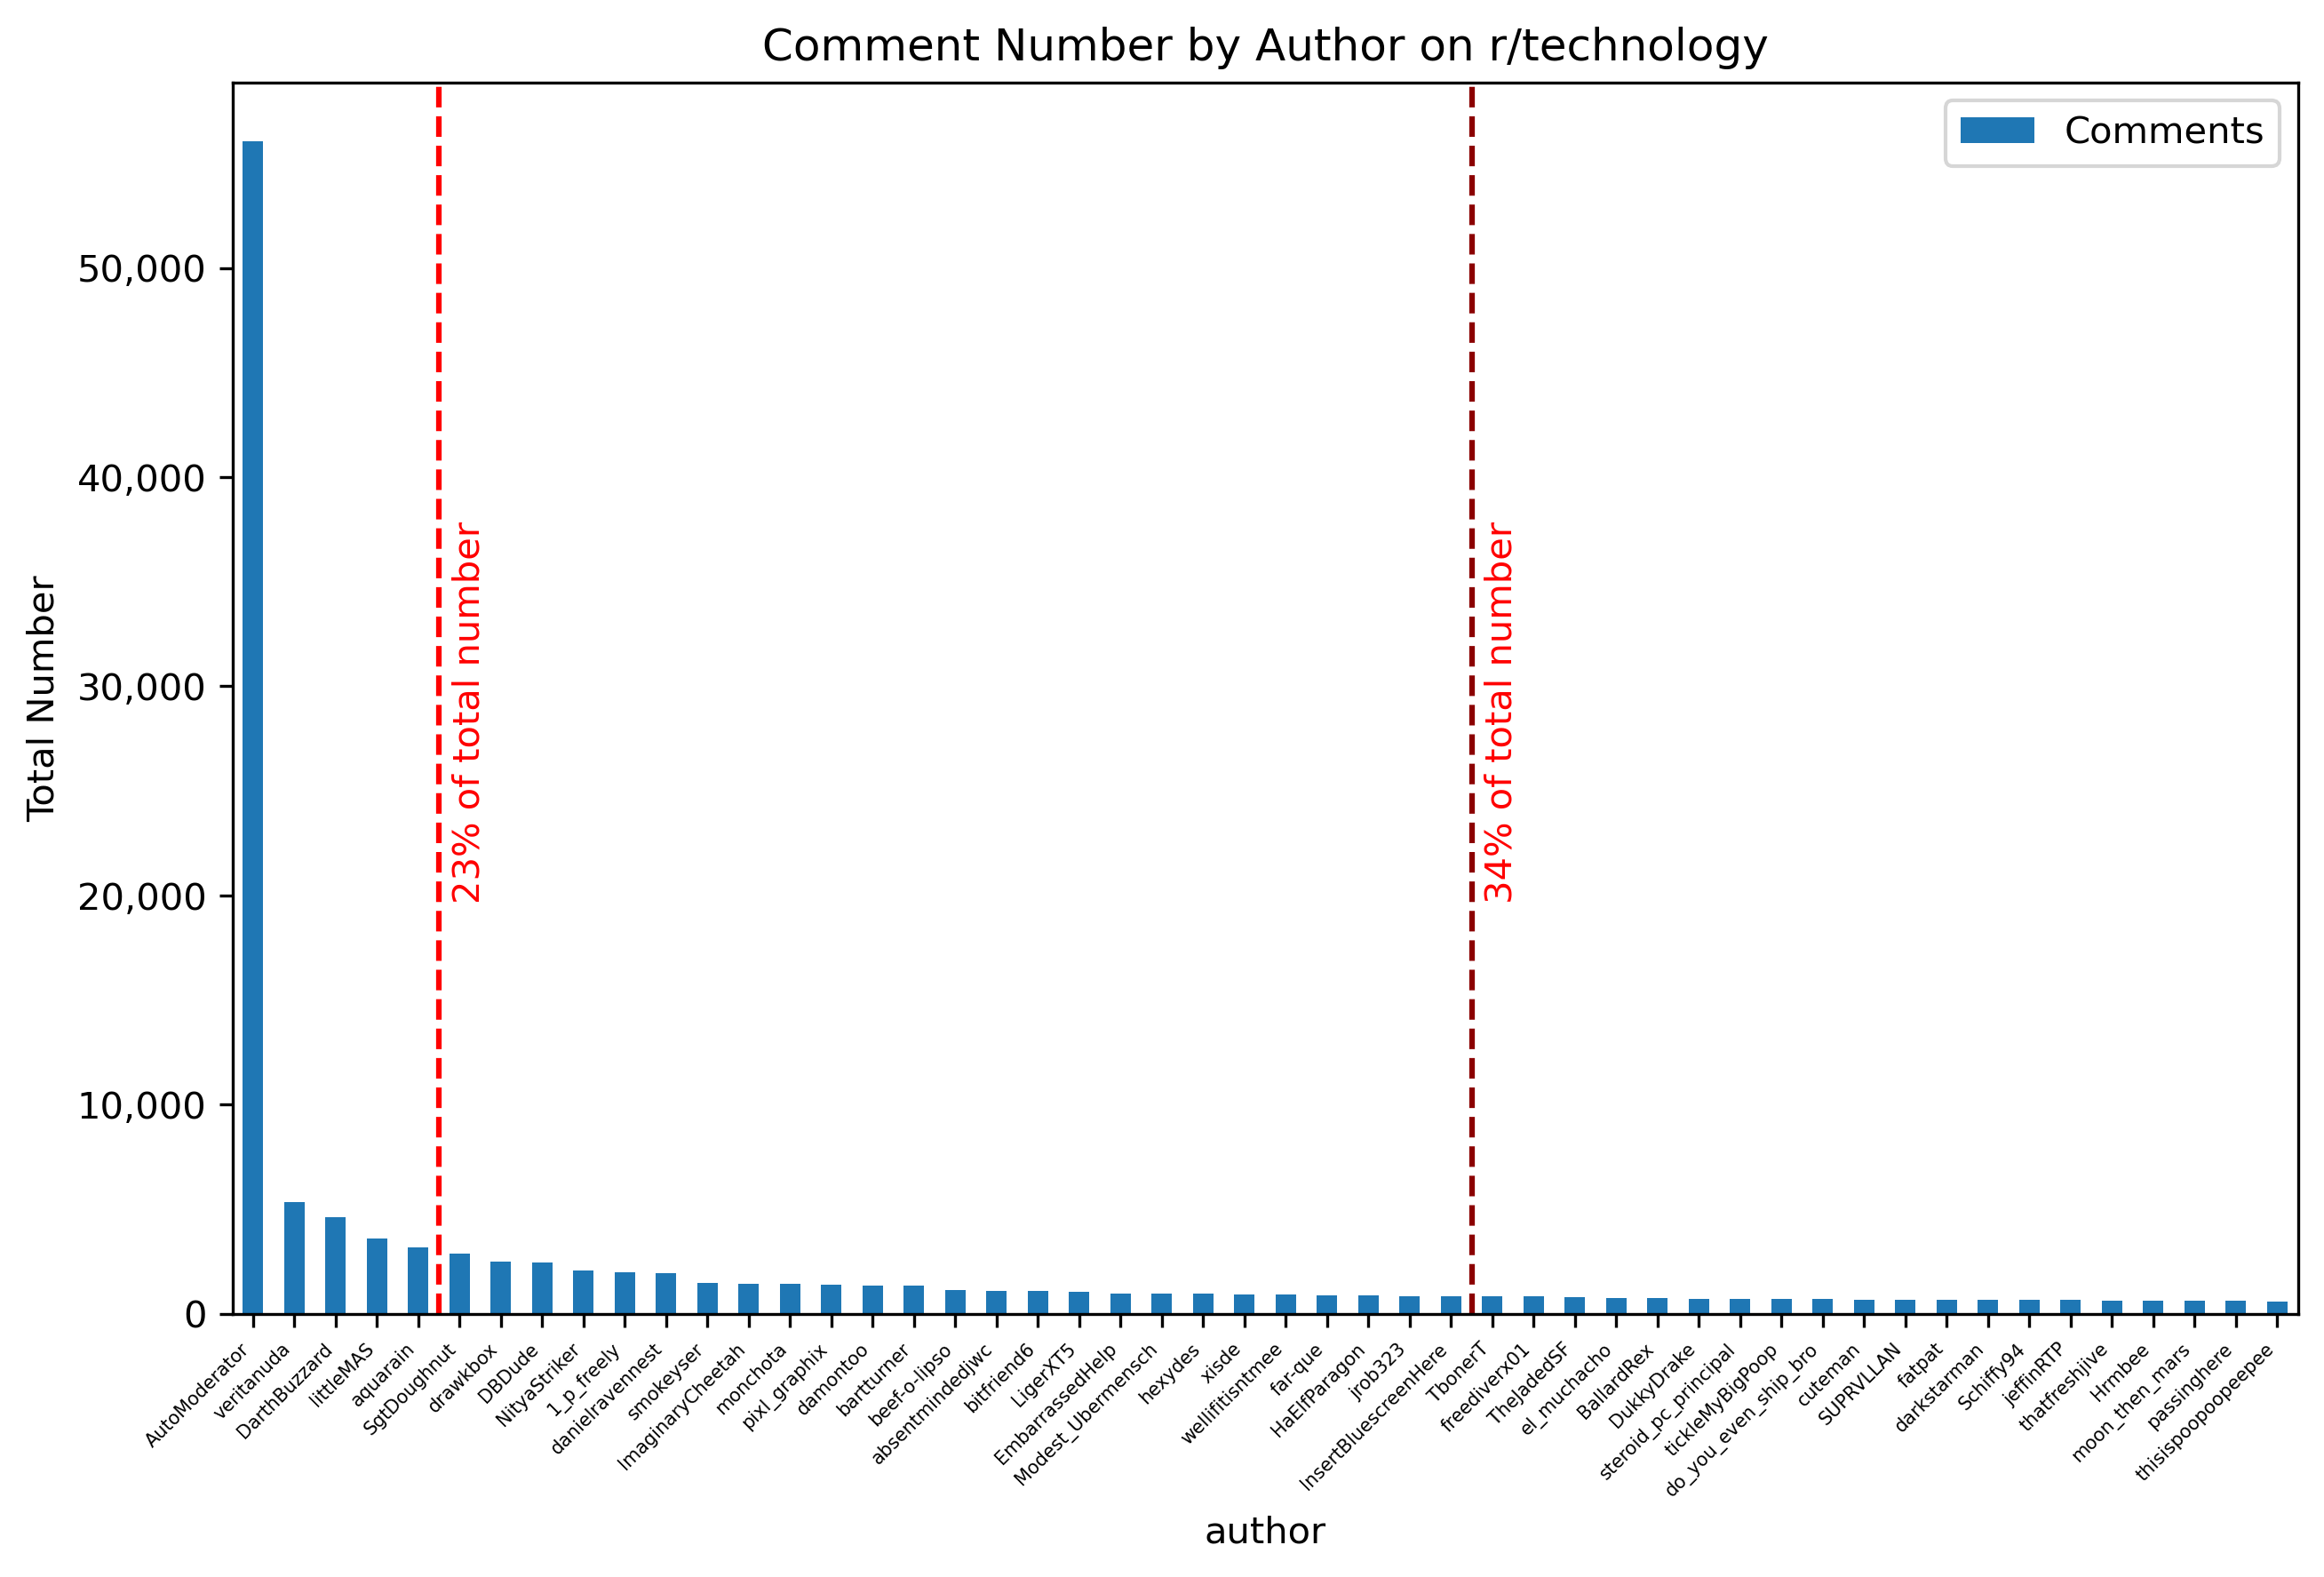

In [81]:
author_number_plot = tech_author_df.sort_values(by='comments_count', ascending=False).head(50)

plt.rcParams["figure.figsize"] = (5,2)
plt.rcParams["figure.dpi"] = 300

# create a stacked bar chart
ax = author_number_plot[['author','comments_count']].plot(kind='bar', stacked=True, x='author', figsize=(10, 6))
ax.set_ylabel('Total Number')


# customize the chart
plt.title('Comment Number by Author on r/technology')
plt.legend(['Comments'], loc='upper right')

plt.xticks(rotation=45, fontsize=5, ha='right')

plt.axvline(x=4.5, color='red', ls='--')
ax.text(4.8, 20000, "23% of total number", color='red', rotation=90)

plt.axvline(x=29.5, color='darkred', ls='--')
ax.text(29.8, 20000, "34% of total number", color='red', rotation=90)


ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### `r/Futurology`

In [88]:
futu_sub_author_count = future_submissions.groupBy('author').agg(count("author").alias("subs_count")).sort(desc('subs_count'))
futu_com_author_count = future_comments.groupBy('author').agg(count("author").alias("comments_count")).sort(desc('comments_count'))

In [134]:
futu_sub_author_count.show(10)
futu_com_author_count.show(10)

+-----------------+----------+
|           author|subs_count|
+-----------------+----------+
|        [deleted]|      8057|
|         Gari_305|      1587|
|        izumi3682|      1146|
|QuantumThinkology|       748|
|       lughnasadh|       662|
|          Sorin61|       622|
|           speckz|       570|
|   Dr_Singularity|       496|
|        kernals12|       392|
|     123designSRQ|       316|
+-----------------+----------+
only showing top 10 rows



+---------------+--------------+
|         author|comments_count|
+---------------+--------------+
|      [deleted]|        600671|
|  FuturologyBot|         11926|
|          Surur|          5405|
|  AutoModerator|          5036|
|   StarChild413|          2634|
|  OliverSparrow|          2406|
|   ValyrianJedi|          2264|
|    mhornberger|          2161|
|VitriolicViolet|          1969|
|      kernals12|          1867|
+---------------+--------------+
only showing top 10 rows



In [89]:
futu_author_count = futu_sub_author_count.join(futu_com_author_count, "author")
futu_author_count = futu_author_count.na.fill(0)
futu_author_df = futu_author_count.toPandas()

In [90]:
futu_author_df = futu_author_df[futu_author_df['author'] != '[deleted]']
futu_author_df = futu_author_df.set_index('author').astype(int)
futu_author_df['total_count'] = futu_author_df['subs_count'] + futu_author_df['comments_count']
futu_author_df = futu_author_df.reset_index()

In [91]:
futu_author_df.head()

author  subs_count  comments_count  total_count
0            xopranaut           1              66           67
1              Sapotis           1              20           21
2             Yuli-Ban           3             122          125
3  redingerforcongress          73             503          576
4          Melodicmarc           1              53           54

In [92]:
futu_author_df.to_csv("Futurology_Author.csv",index=False)

#### Total Count

In [101]:
total_number = futu_author_df['total_count'].sum()
print('Total Number:', total_number)
print('28% Number:', int(total_number*.28))
print('11% Number:', int(total_number* .11))

Total Number: 169394
28% Number: 47430
11% Number: 18633


In [94]:
topn_number = futu_author_df.sort_values(by='total_count', ascending=False)['total_count'][0:5].sum()
print('Top 5 Authors Number:', topn_number)

Top 5 Authors Number: 18398


In [95]:
topn_number = futu_author_df.sort_values(by='total_count', ascending=False)['total_count'][0:30].sum()
print('Top 30 Authors Number:', topn_number)

Top 30 Authors Number: 46708


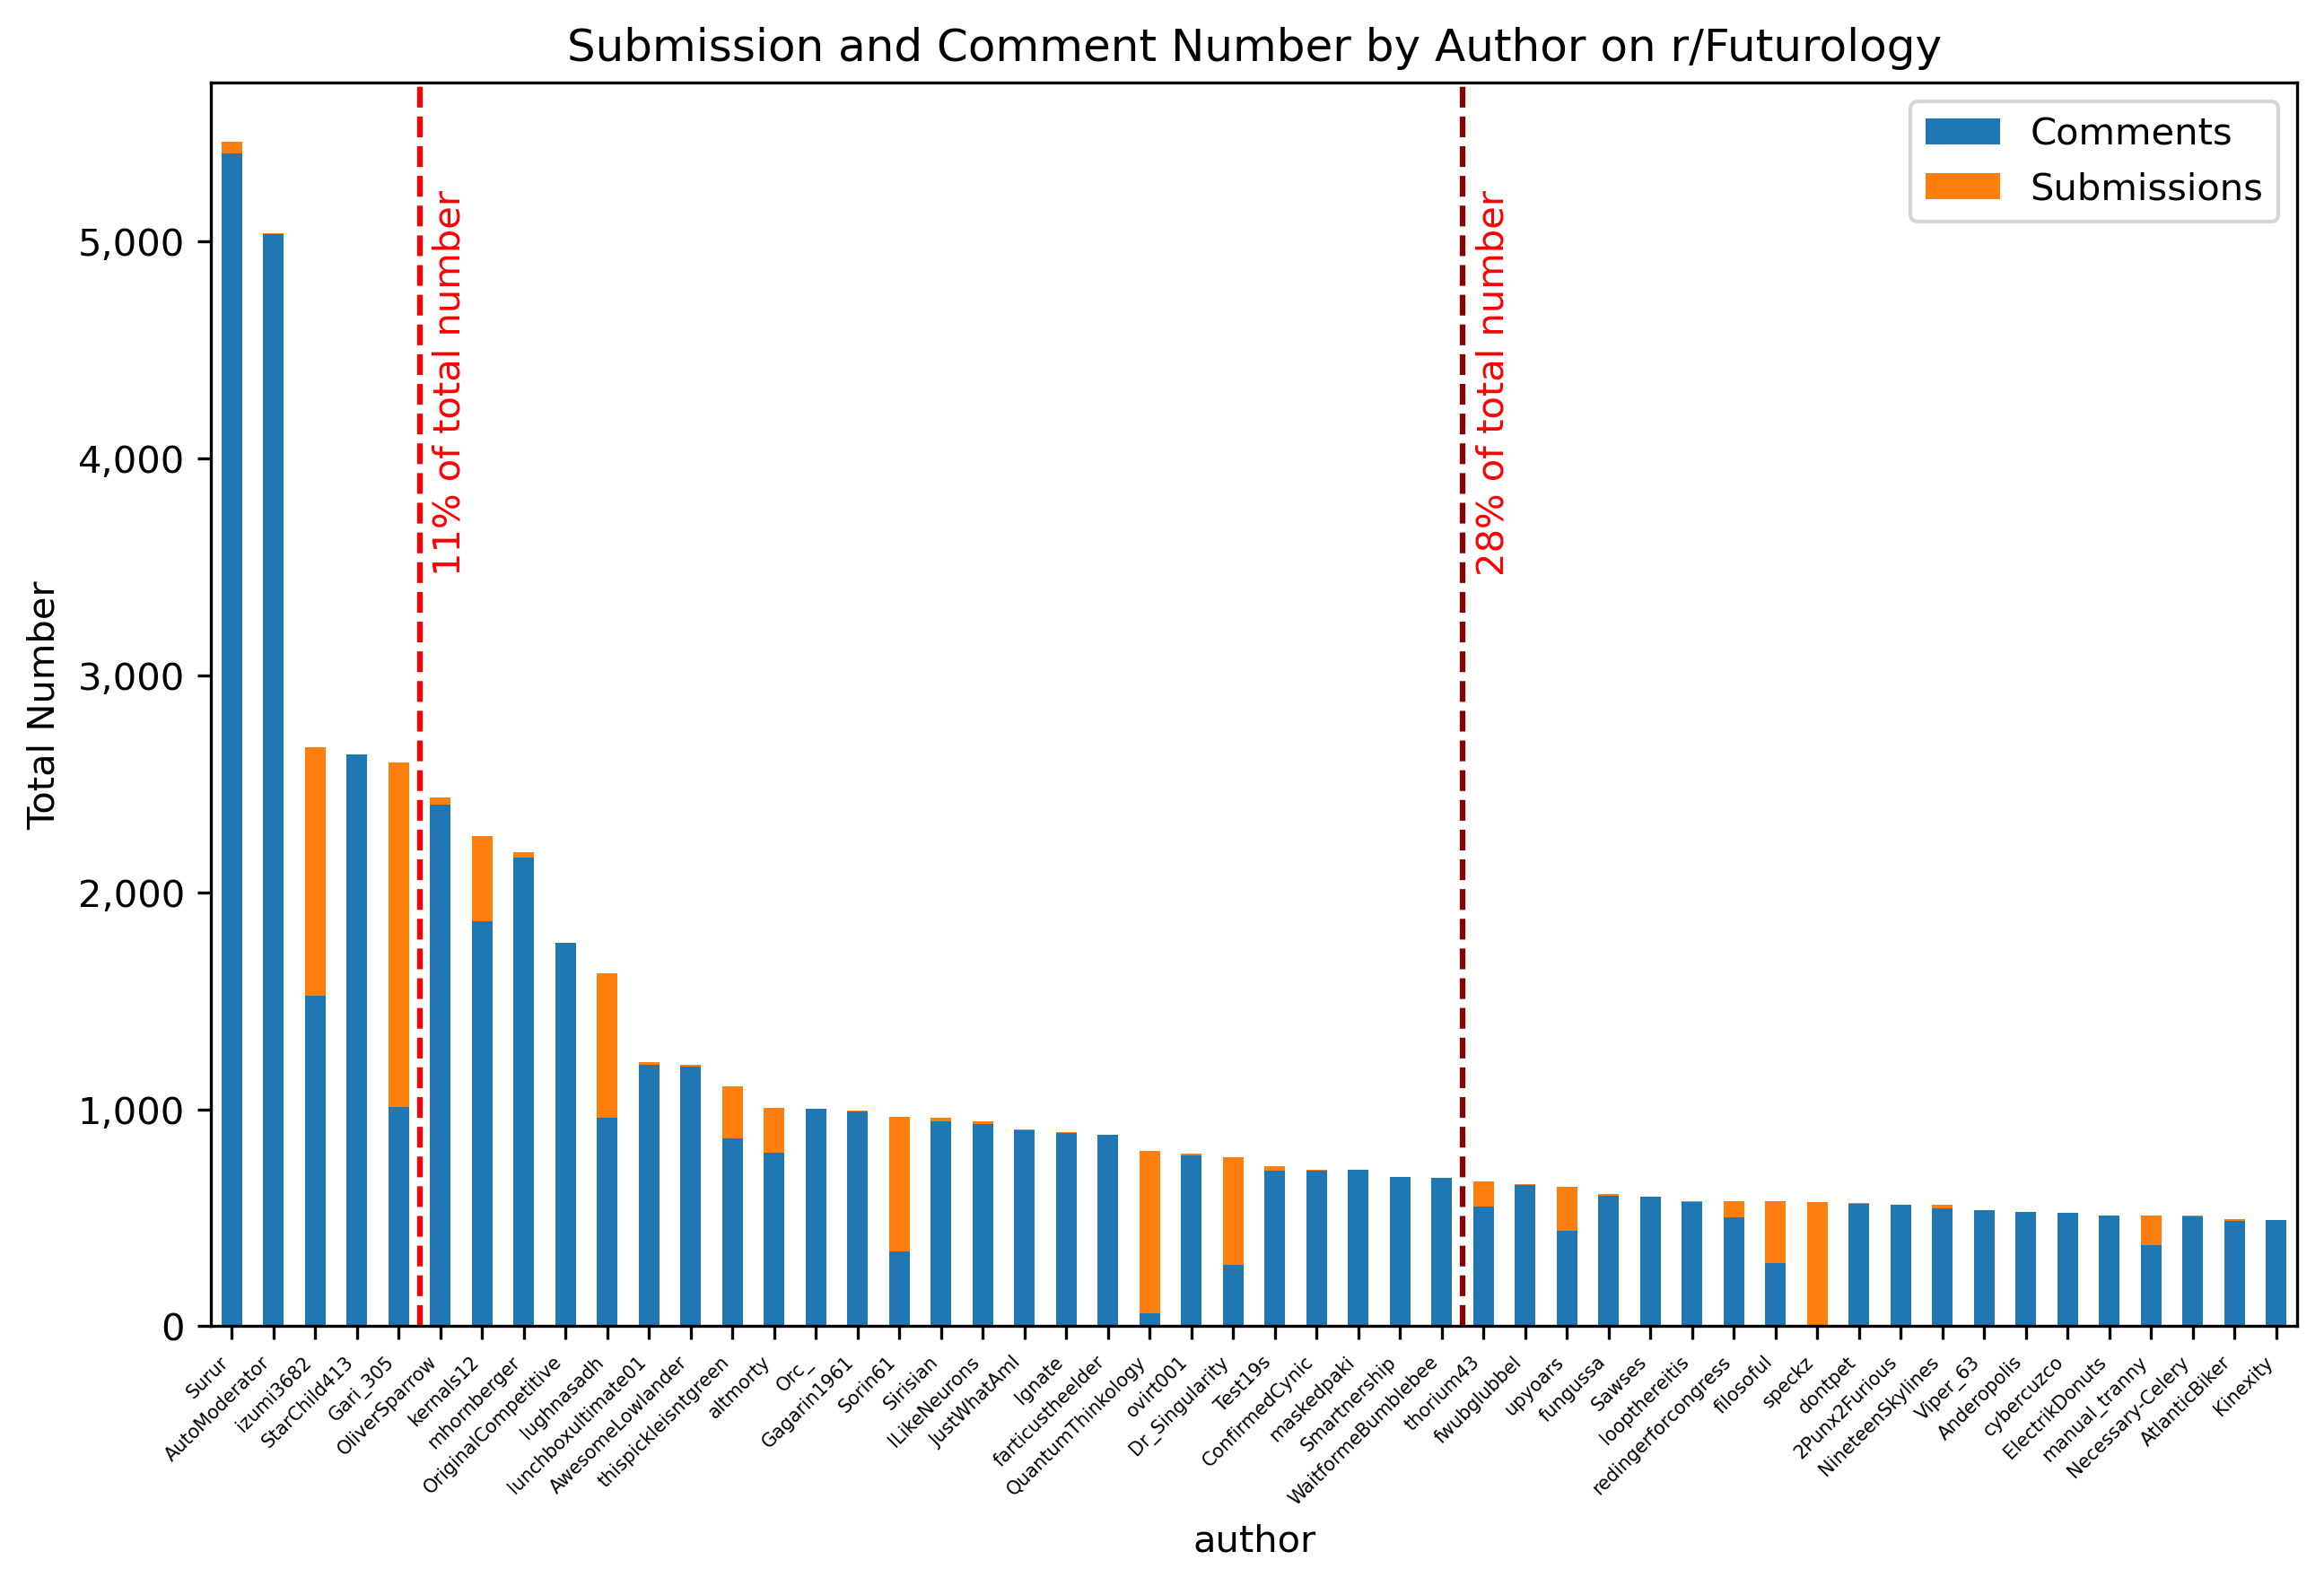

In [104]:
author_number_plot = futu_author_df.sort_values(by='total_count', ascending=False).head(50)

plt.rcParams["figure.figsize"] = (5,2)
plt.rcParams["figure.dpi"] = 300

# create a stacked bar chart
ax = author_number_plot[['author','comments_count', 'subs_count']].plot(kind='bar', stacked=True, x='author', figsize=(10, 6))
ax.set_ylabel('Total Number')


# customize the chart
plt.title('Submission and Comment Number by Author on r/Futurology')
plt.legend(['Comments', 'Submissions'], loc='upper right')

plt.xticks(rotation=45, fontsize=5, ha='right')

plt.axvline(x=4.5, color='red', ls='--')
ax.text(4.8, 3500, "11% of total number", color='red', rotation=90)

plt.axvline(x=29.5, color='darkred', ls='--')
ax.text(29.8, 3500, "28% of total number", color='red', rotation=90)


ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

#### Submission Count

In [115]:
total_number = futu_author_df['subs_count'].sum()
print('Total Number:', total_number)
print('41% Number:', int(total_number*.41))
print('22% Number:', int(total_number* .22))

Total Number: 21943
41% Number: 8996
22% Number: 4827


In [106]:
topn_number = futu_author_df.sort_values(by='subs_count', ascending=False)['subs_count'][0:5].sum()
print('Top 5 Authors Number:', topn_number)

Top 5 Authors Number: 4765


In [109]:
topn_number = futu_author_df.sort_values(by='subs_count', ascending=False)['subs_count'][0:30].sum()
print('Top 30 Authors Number:', topn_number)

Top 30 Authors Number: 9018


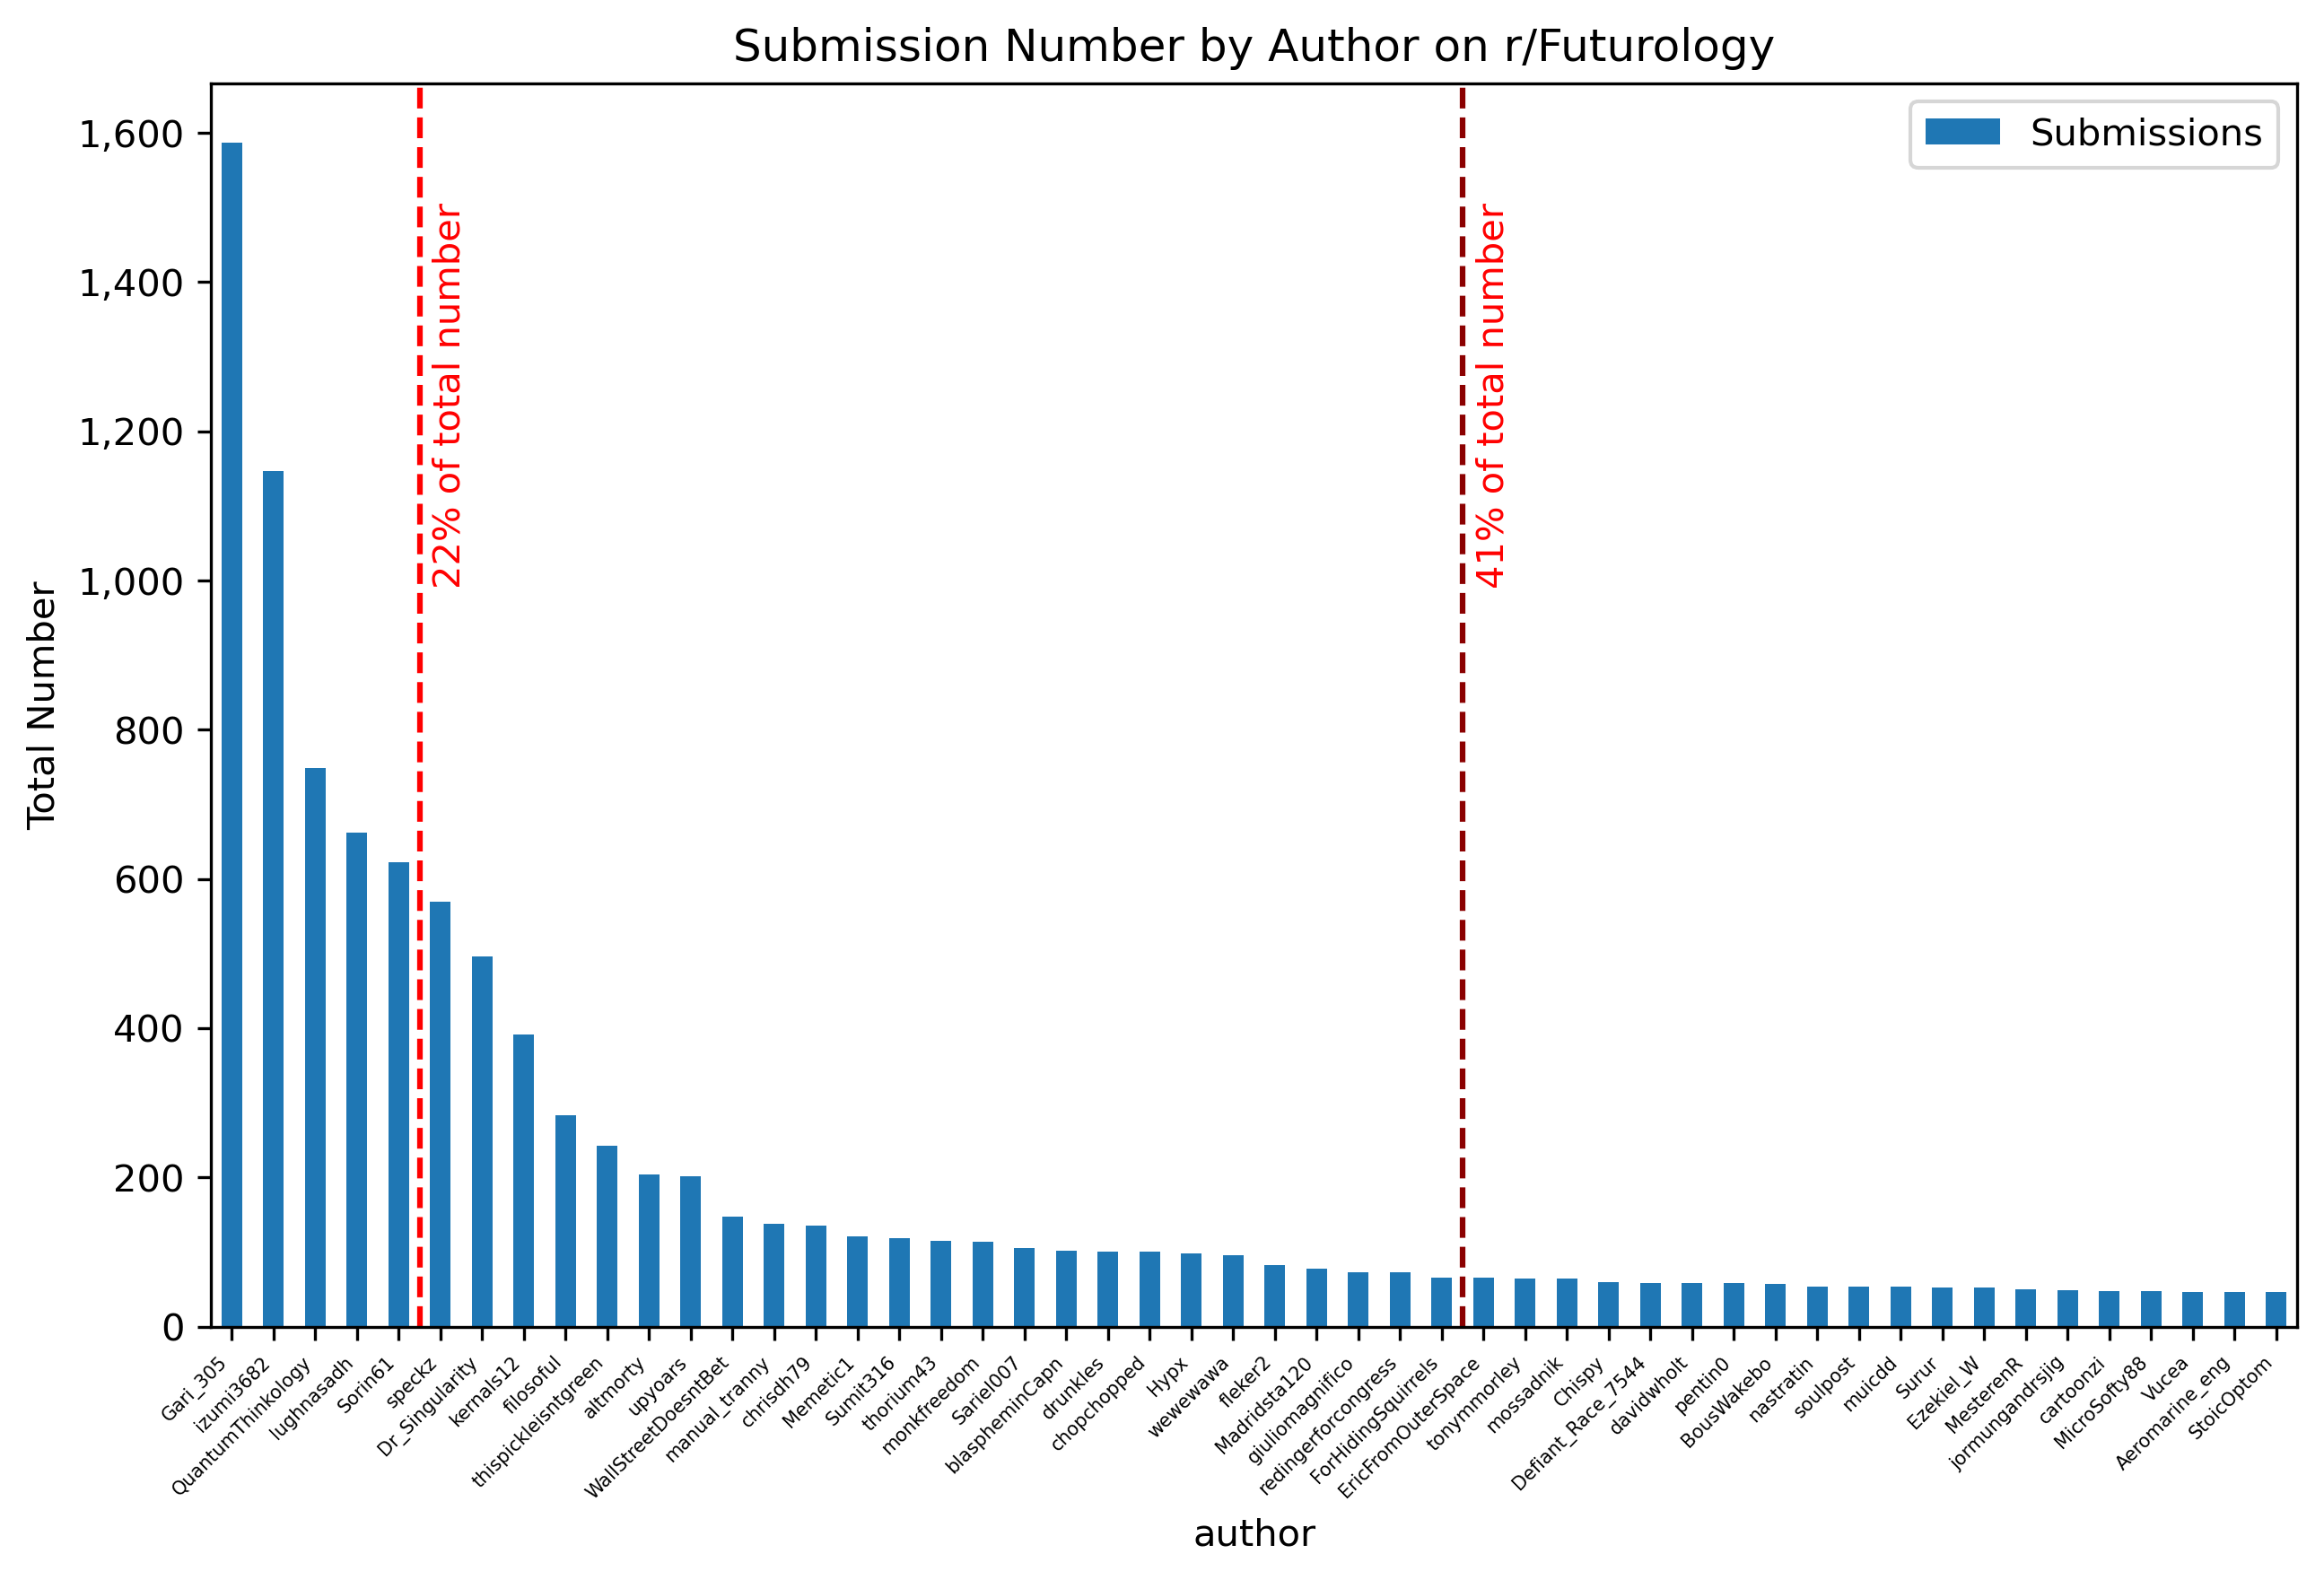

In [129]:
author_number_plot = futu_author_df.sort_values(by='subs_count', ascending=False).head(50)

plt.rcParams["figure.figsize"] = (5,2)
plt.rcParams["figure.dpi"] = 300

# create a stacked bar chart
ax = author_number_plot[['author','subs_count']].plot(kind='bar', stacked=True, x='author', figsize=(10, 6))
ax.set_ylabel('Total Number')


# customize the chart
plt.title('Submission Number by Author on r/Futurology')
plt.legend(['Submissions'], loc='upper right')

plt.xticks(rotation=45, fontsize=5, ha='right')

plt.axvline(x=4.5, color='red', ls='--')
ax.text(4.8, 1000, "22% of total number", color='red', rotation=90)

plt.axvline(x=29.5, color='darkred', ls='--')
ax.text(29.8, 1000, "41% of total number", color='red', rotation=90)


ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

#### Comment Count

In [125]:
total_number = futu_author_df['comments_count'].sum()
print('Total Number:', total_number)
print('28% Number:', int(total_number*.28))
print('12% Number:', int(total_number* .12))

Total Number: 147451
28% Number: 41286
12% Number: 17694


In [119]:
topn_number = futu_author_df.sort_values(by='comments_count', ascending=False)['comments_count'][0:5].sum()
print('Top 5 Authors Number:', topn_number)

Top 5 Authors Number: 17642


In [120]:
topn_number = futu_author_df.sort_values(by='comments_count', ascending=False)['comments_count'][0:30].sum()
print('Top 30 Authors Number:', topn_number)

Top 30 Authors Number: 41553


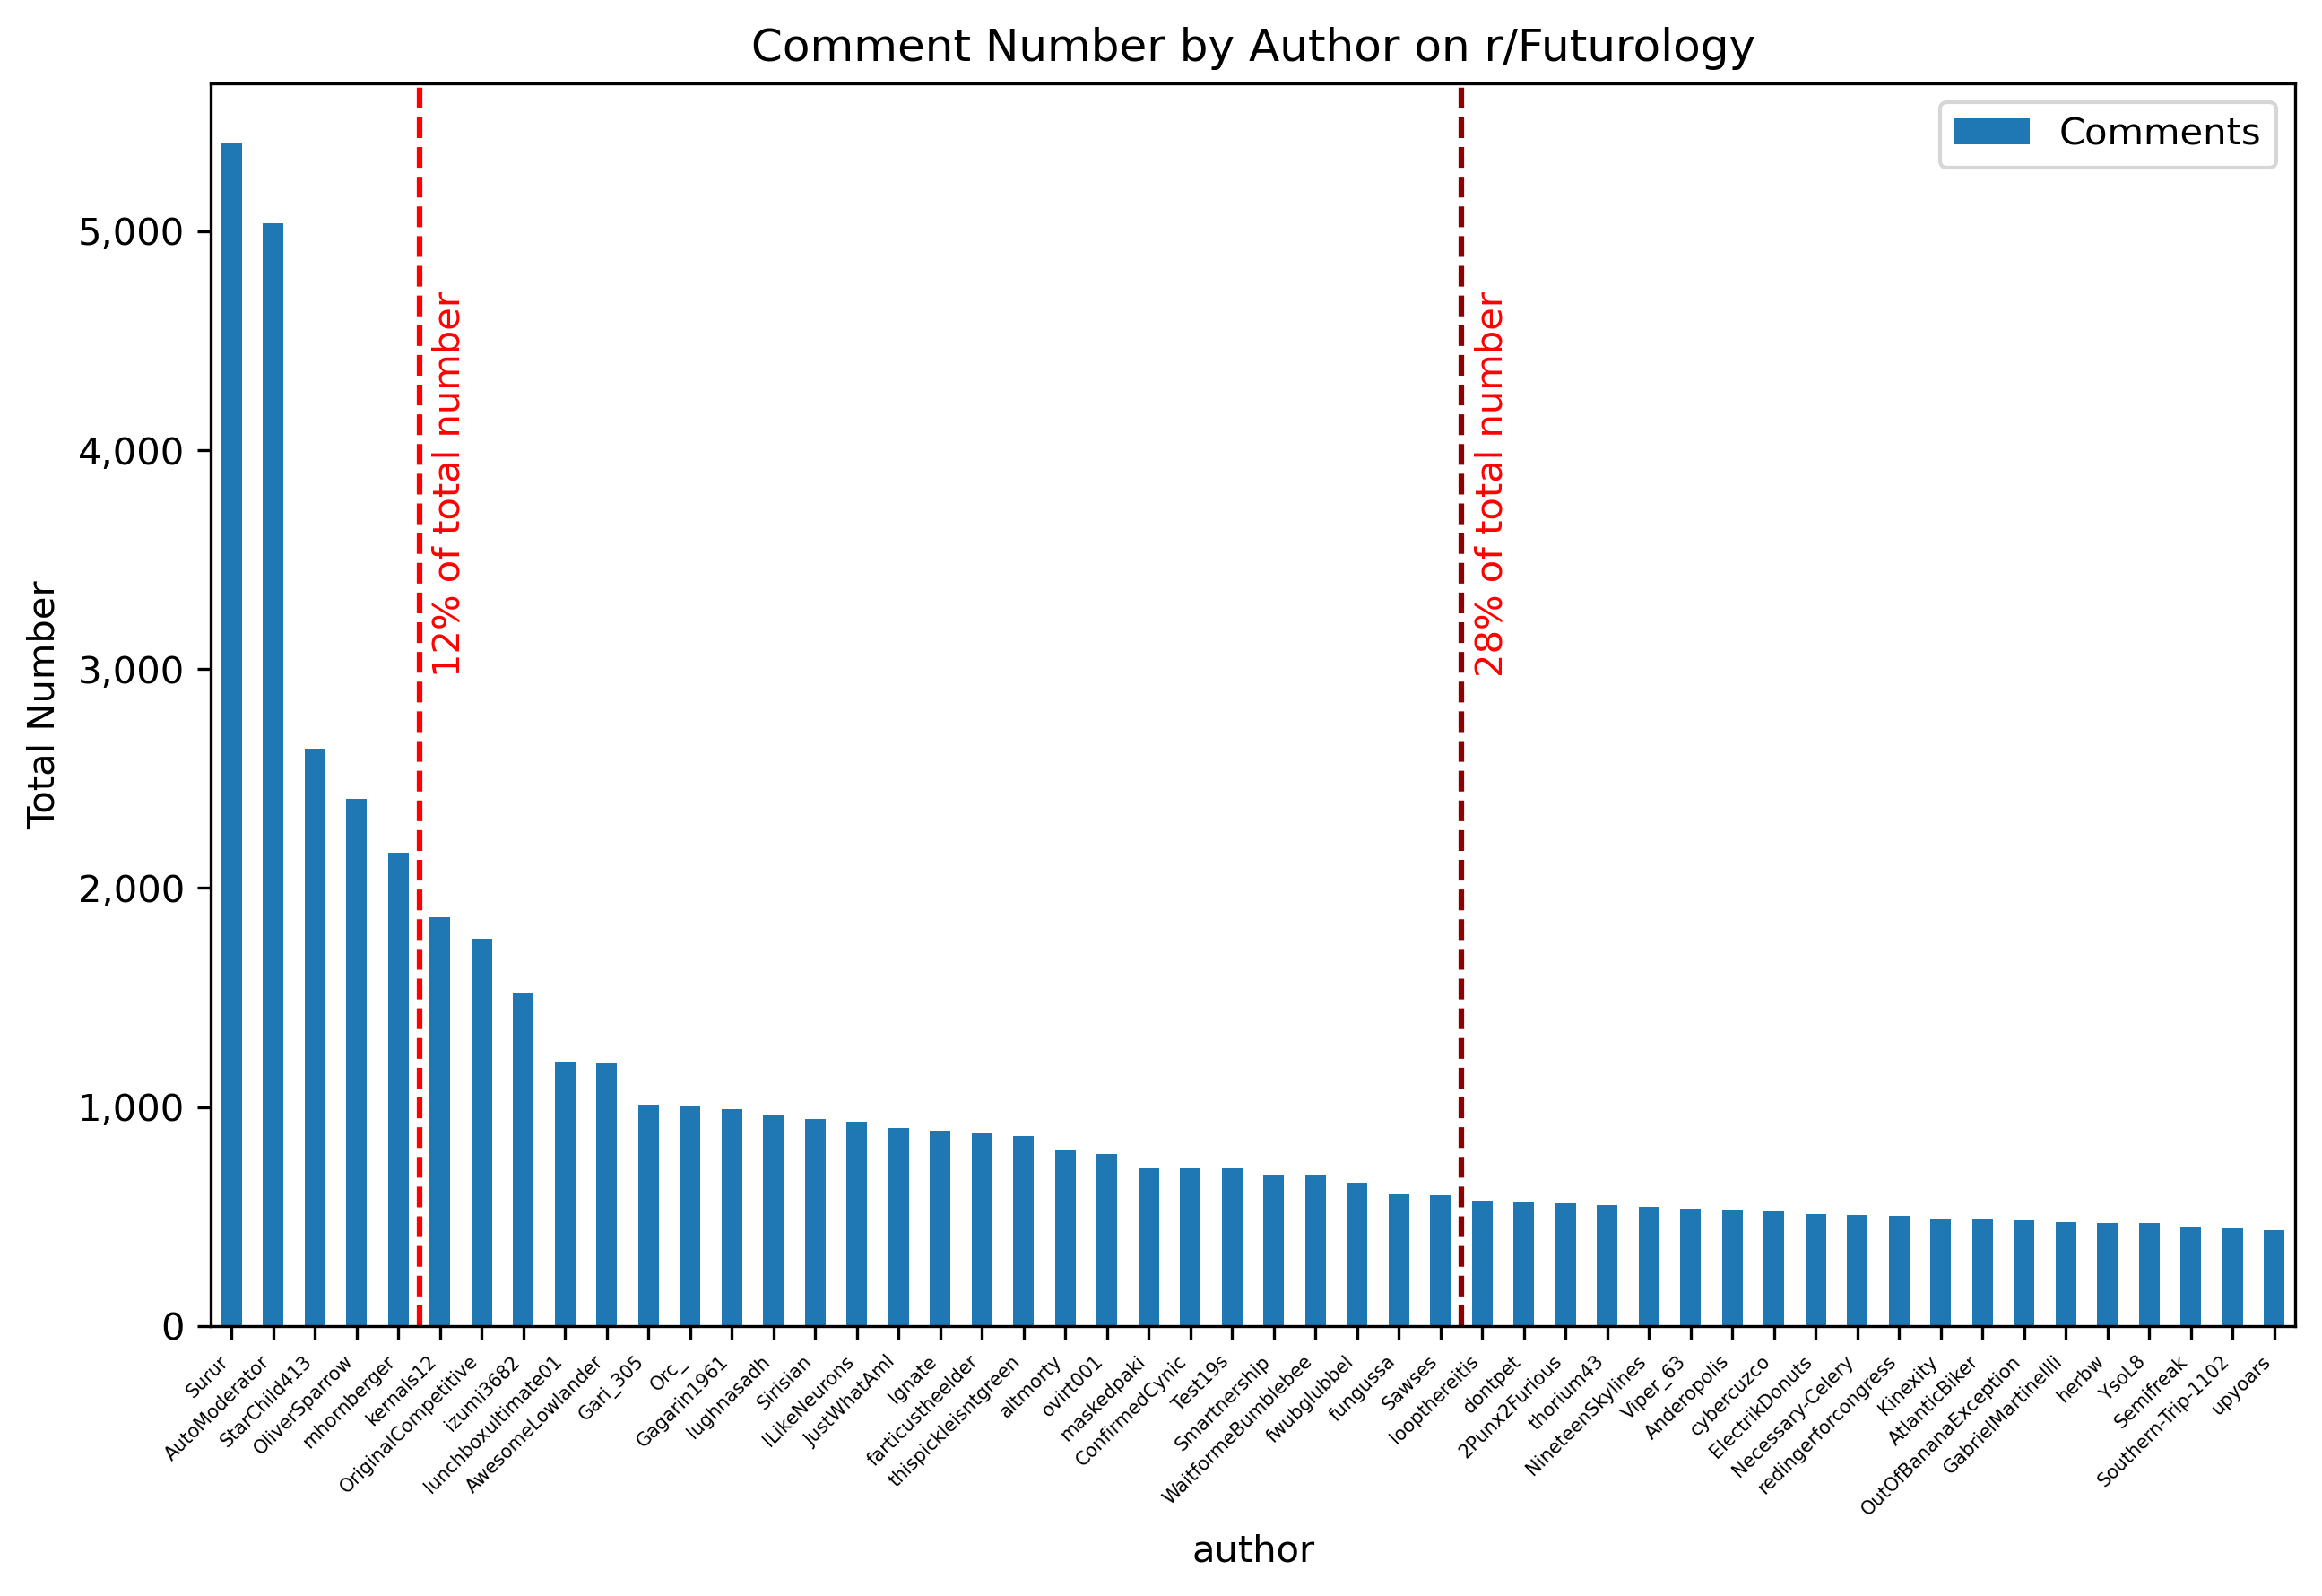

In [5]:
author_number_plot = futu_author_df.sort_values(by='comments_count', ascending=False).head(50)

plt.rcParams["figure.figsize"] = (5,2)
plt.rcParams["figure.dpi"] = 300

# create a stacked bar chart
ax = author_number_plot[['author','comments_count']].plot(kind='bar', stacked=True, x='author', figsize=(10, 6))
ax.set_ylabel('Total Number')


# customize the chart
plt.title('Comment Number by Author on r/Futurology')
plt.legend(['Comments'], loc='upper right')

plt.xticks(rotation=45, fontsize=5, ha='right')

plt.axvline(x=4.5, color='red', ls='--')
ax.text(4.8, 3000, "12% of total number", color='red', rotation=90)

plt.axvline(x=29.5, color='darkred', ls='--')
ax.text(29.8, 3000, "28% of total number", color='red', rotation=90)


ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### 2. Analyzing Fluctuations in Technology Discourse Over Time

In our analysis, we delve into the evolving landscape of discussions surrounding technology, particularly focusing on pivotal events such as the rollout of GPT-3.5 and subsequent advancements like GPT-4. Our objective is to gauge their impact on the overall discourse within the realms of both `r/Technology` and `r/Futurology`. By scrutinizing the patterns of engagement—encompassing both submissions and comments—across various time frames, we aim to unearth trends in the volume and intensity of conversations concerning technology among community members. This inquiry seeks to provide valuable insights into the dynamics of public discourse and its evolution over time in the context of technological developments.

In [9]:
from pyspark.sql.functions import *

In [24]:
tech_sub_date_count = technology_submissions.groupBy('created_date').agg(count("created_date")\
                                                                         .alias("subs_count")).sort(desc('subs_count'))
tech_com_date_count = technology_comments.groupBy('created_date').agg(count("created_date")\
                                                                      .alias("comments_count")).sort(desc('comments_count'))

In [10]:
futu_sub_date_count = future_submissions.groupBy('created_date').agg(count("created_date")\
                                                                         .alias("subs_count")).sort(desc('subs_count'))
futu_com_date_count = future_comments.groupBy('created_date').agg(count("created_date")\
                                                                      .alias("comments_count")).sort(desc('comments_count'))

In [46]:
tech_sub_date_count.show(10)

+------------+----------+
|created_date|subs_count|
+------------+----------+
|  2021-02-11|       803|
|  2021-02-23|       787|
|  2021-02-24|       785|
|  2021-02-22|       761|
|  2021-01-21|       751|
|  2021-02-17|       737|
|  2021-01-27|       736|
|  2021-03-10|       717|
|  2021-02-12|       708|
|  2021-01-26|       701|
+------------+----------+
only showing top 10 rows



In [25]:
tech_date_count = tech_sub_date_count.join(tech_com_date_count, "created_date")
tech_date_count = tech_date_count.na.fill(0)
tech_date_df = tech_date_count.toPandas()

In [26]:
tech_date_df.head()

created_date  subs_count  comments_count
0   2021-12-23         185            4496
1   2021-02-18         372            7723
2   2022-09-03         130            9551
3   2022-11-23         204           14123
4   2021-08-06         210            6156

In [27]:
tech_date_df.to_csv("Technology_date.csv",index=False)

In [11]:
futu_date_count = futu_sub_date_count.join(futu_com_date_count, "created_date")
futu_date_count = futu_date_count.na.fill(0)
futu_date_df = futu_date_count.toPandas()

In [12]:
futu_date_df.head()

created_date  subs_count  comments_count
0   2021-12-23          42            2196
1   2021-02-18          93            1963
2   2022-09-03          31            2227
3   2022-11-23          55            4260
4   2021-08-06          47            2849

In [13]:
futu_date_df.to_csv("Futurology_date.csv",index=False)

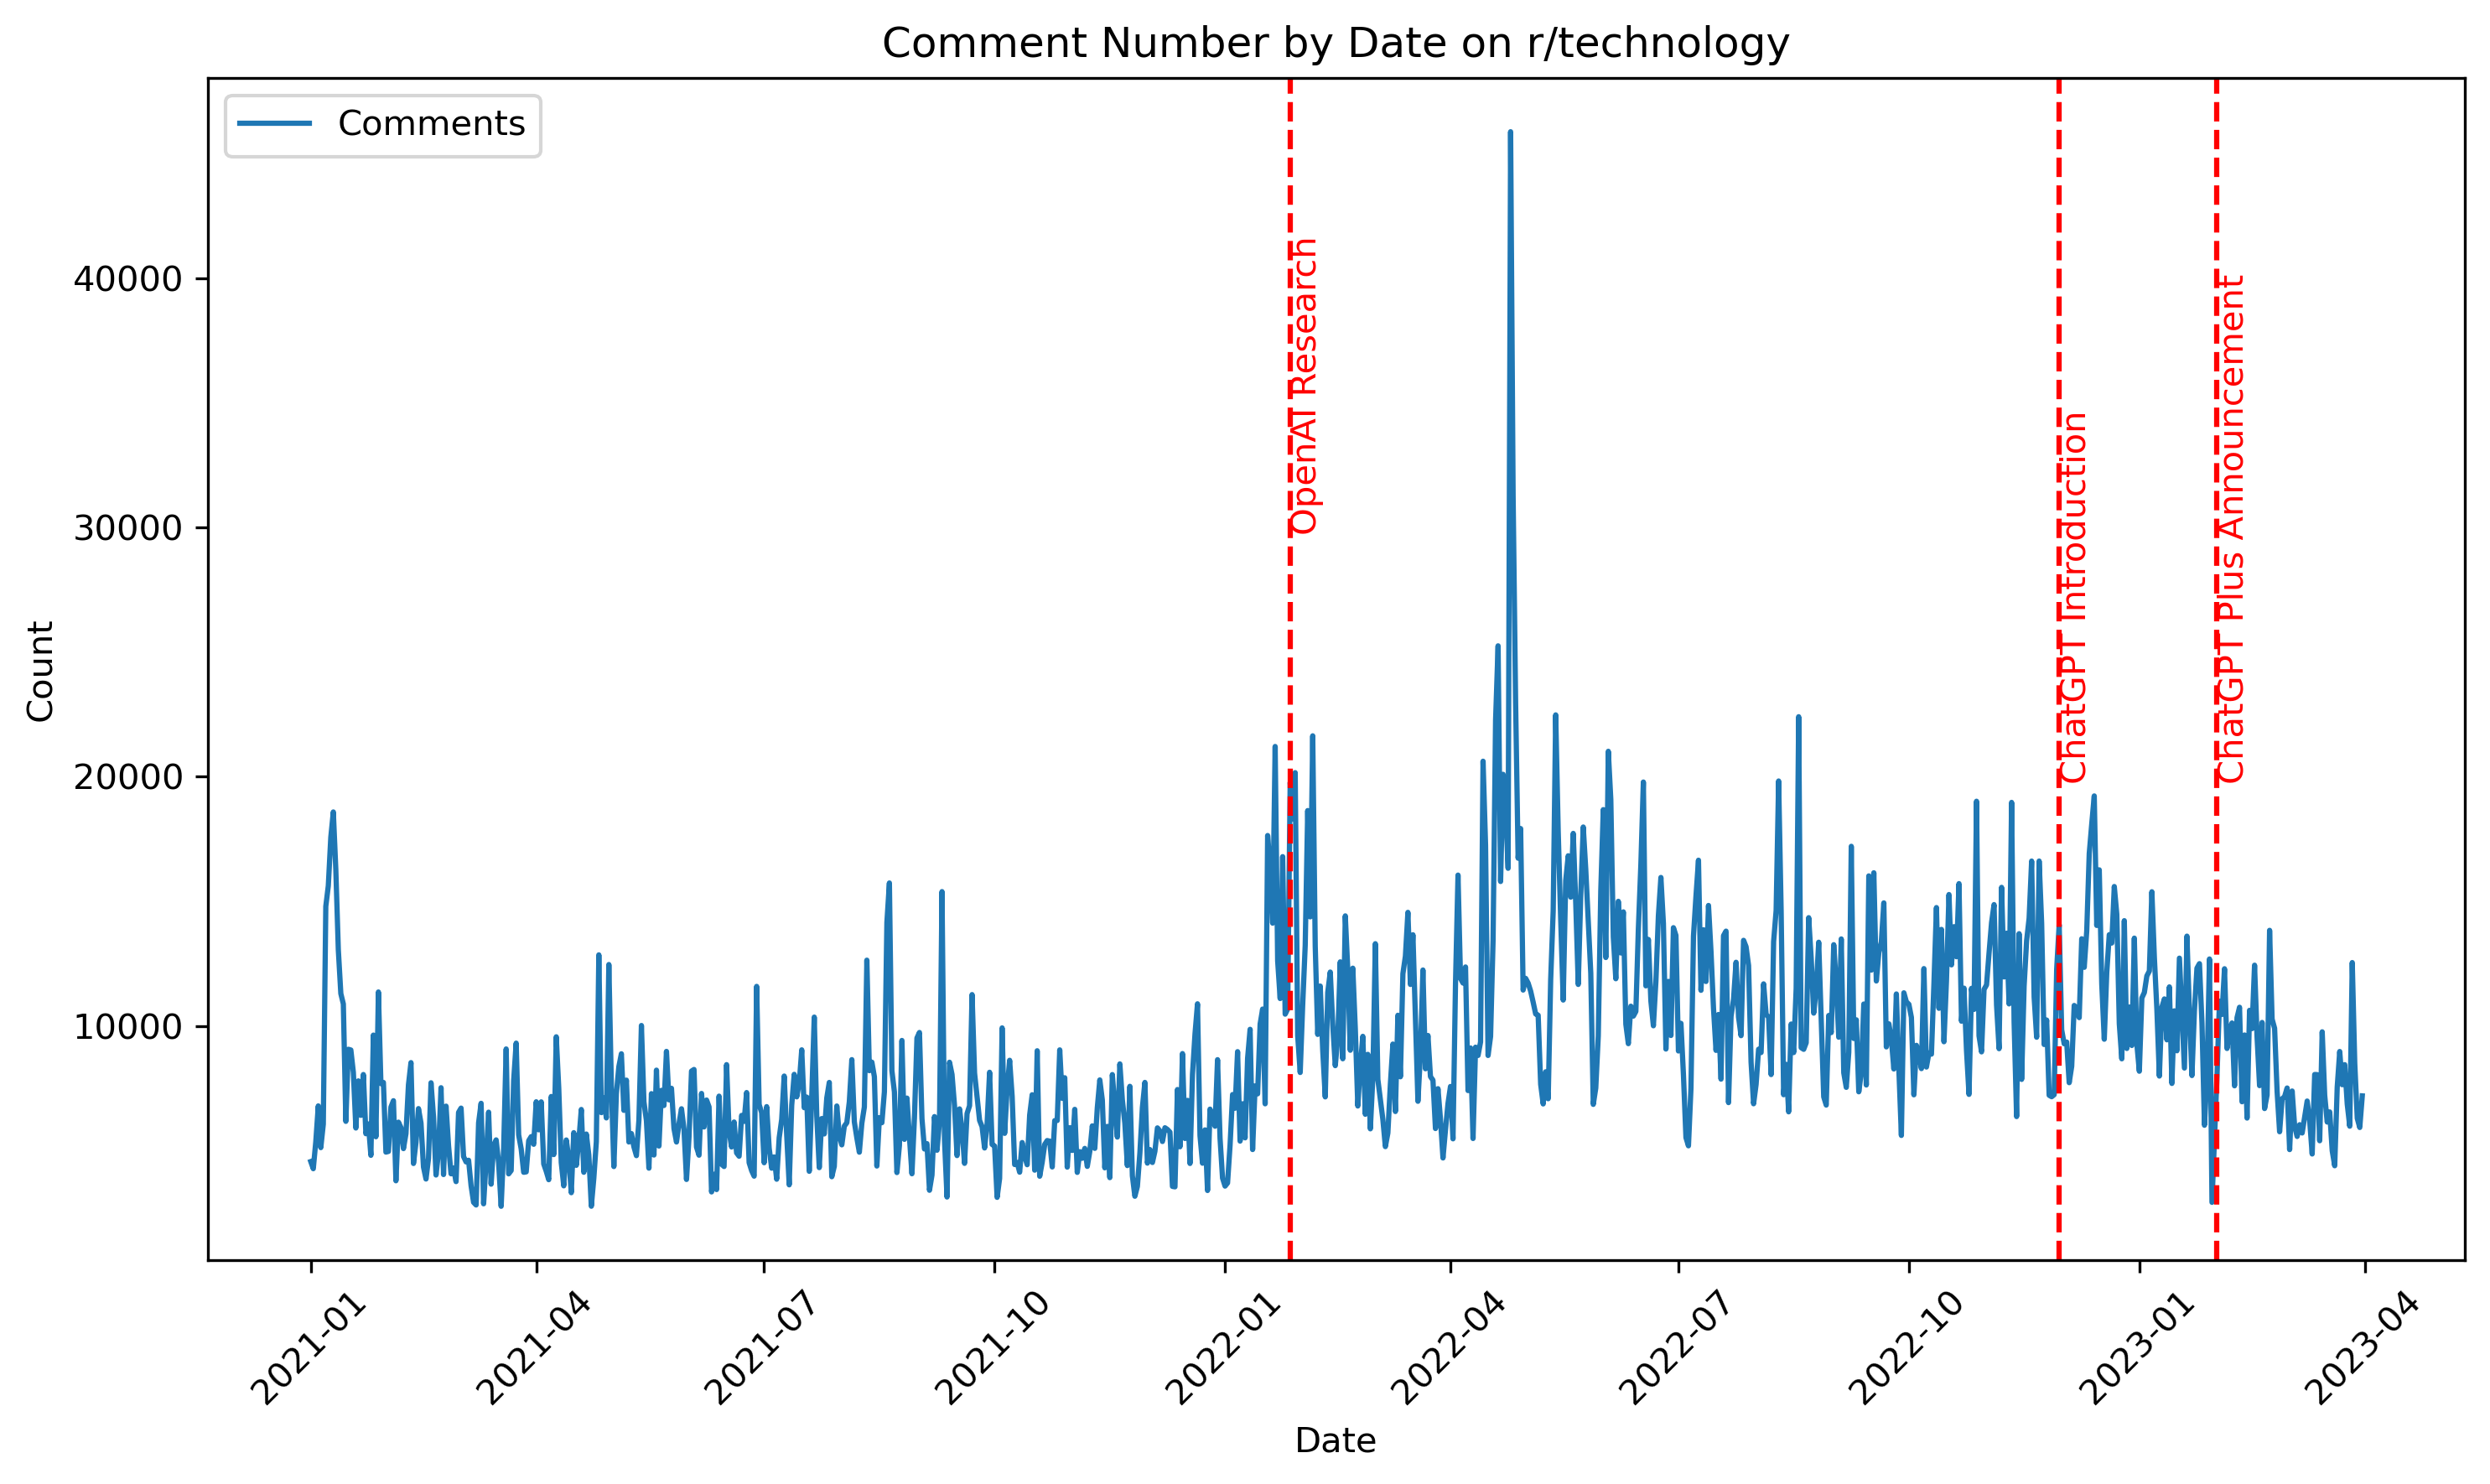

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

tech_date_df1 = tech_date_df.reset_index()
# Convert 'created_date' column to datetime
tech_date_df1['created_date'] = pd.to_datetime(tech_date_df1['created_date'])

# Sort the DataFrame by 'created_date' column
tech_date_df1 = tech_date_df1.sort_values(by='created_date')

plt.figure(figsize=(10, 6))
plt.rcParams["figure.dpi"] = 300

# Plot submissions
#plt.plot(tech_date_df1['created_date'], tech_date_df1['subs_count'], label='Submissions')

# Plot comments
plt.plot(tech_date_df1['created_date'], tech_date_df1['comments_count'], label='Comments')

# Add vertical lines for significant events
plt.axvline(x=pd.to_datetime('2022-01-27'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-01-27'), 30000, "OpenAI Research", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2022-11-30'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-11-30'), 20000, "ChatGPT Introduction", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2023-02-01'), color='red', linestyle='--')
plt.text(pd.to_datetime('2023-02-01'), 20000, "ChatGPT Plus Announcement", color='red', rotation=90)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comment Number by Date on r/technology')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

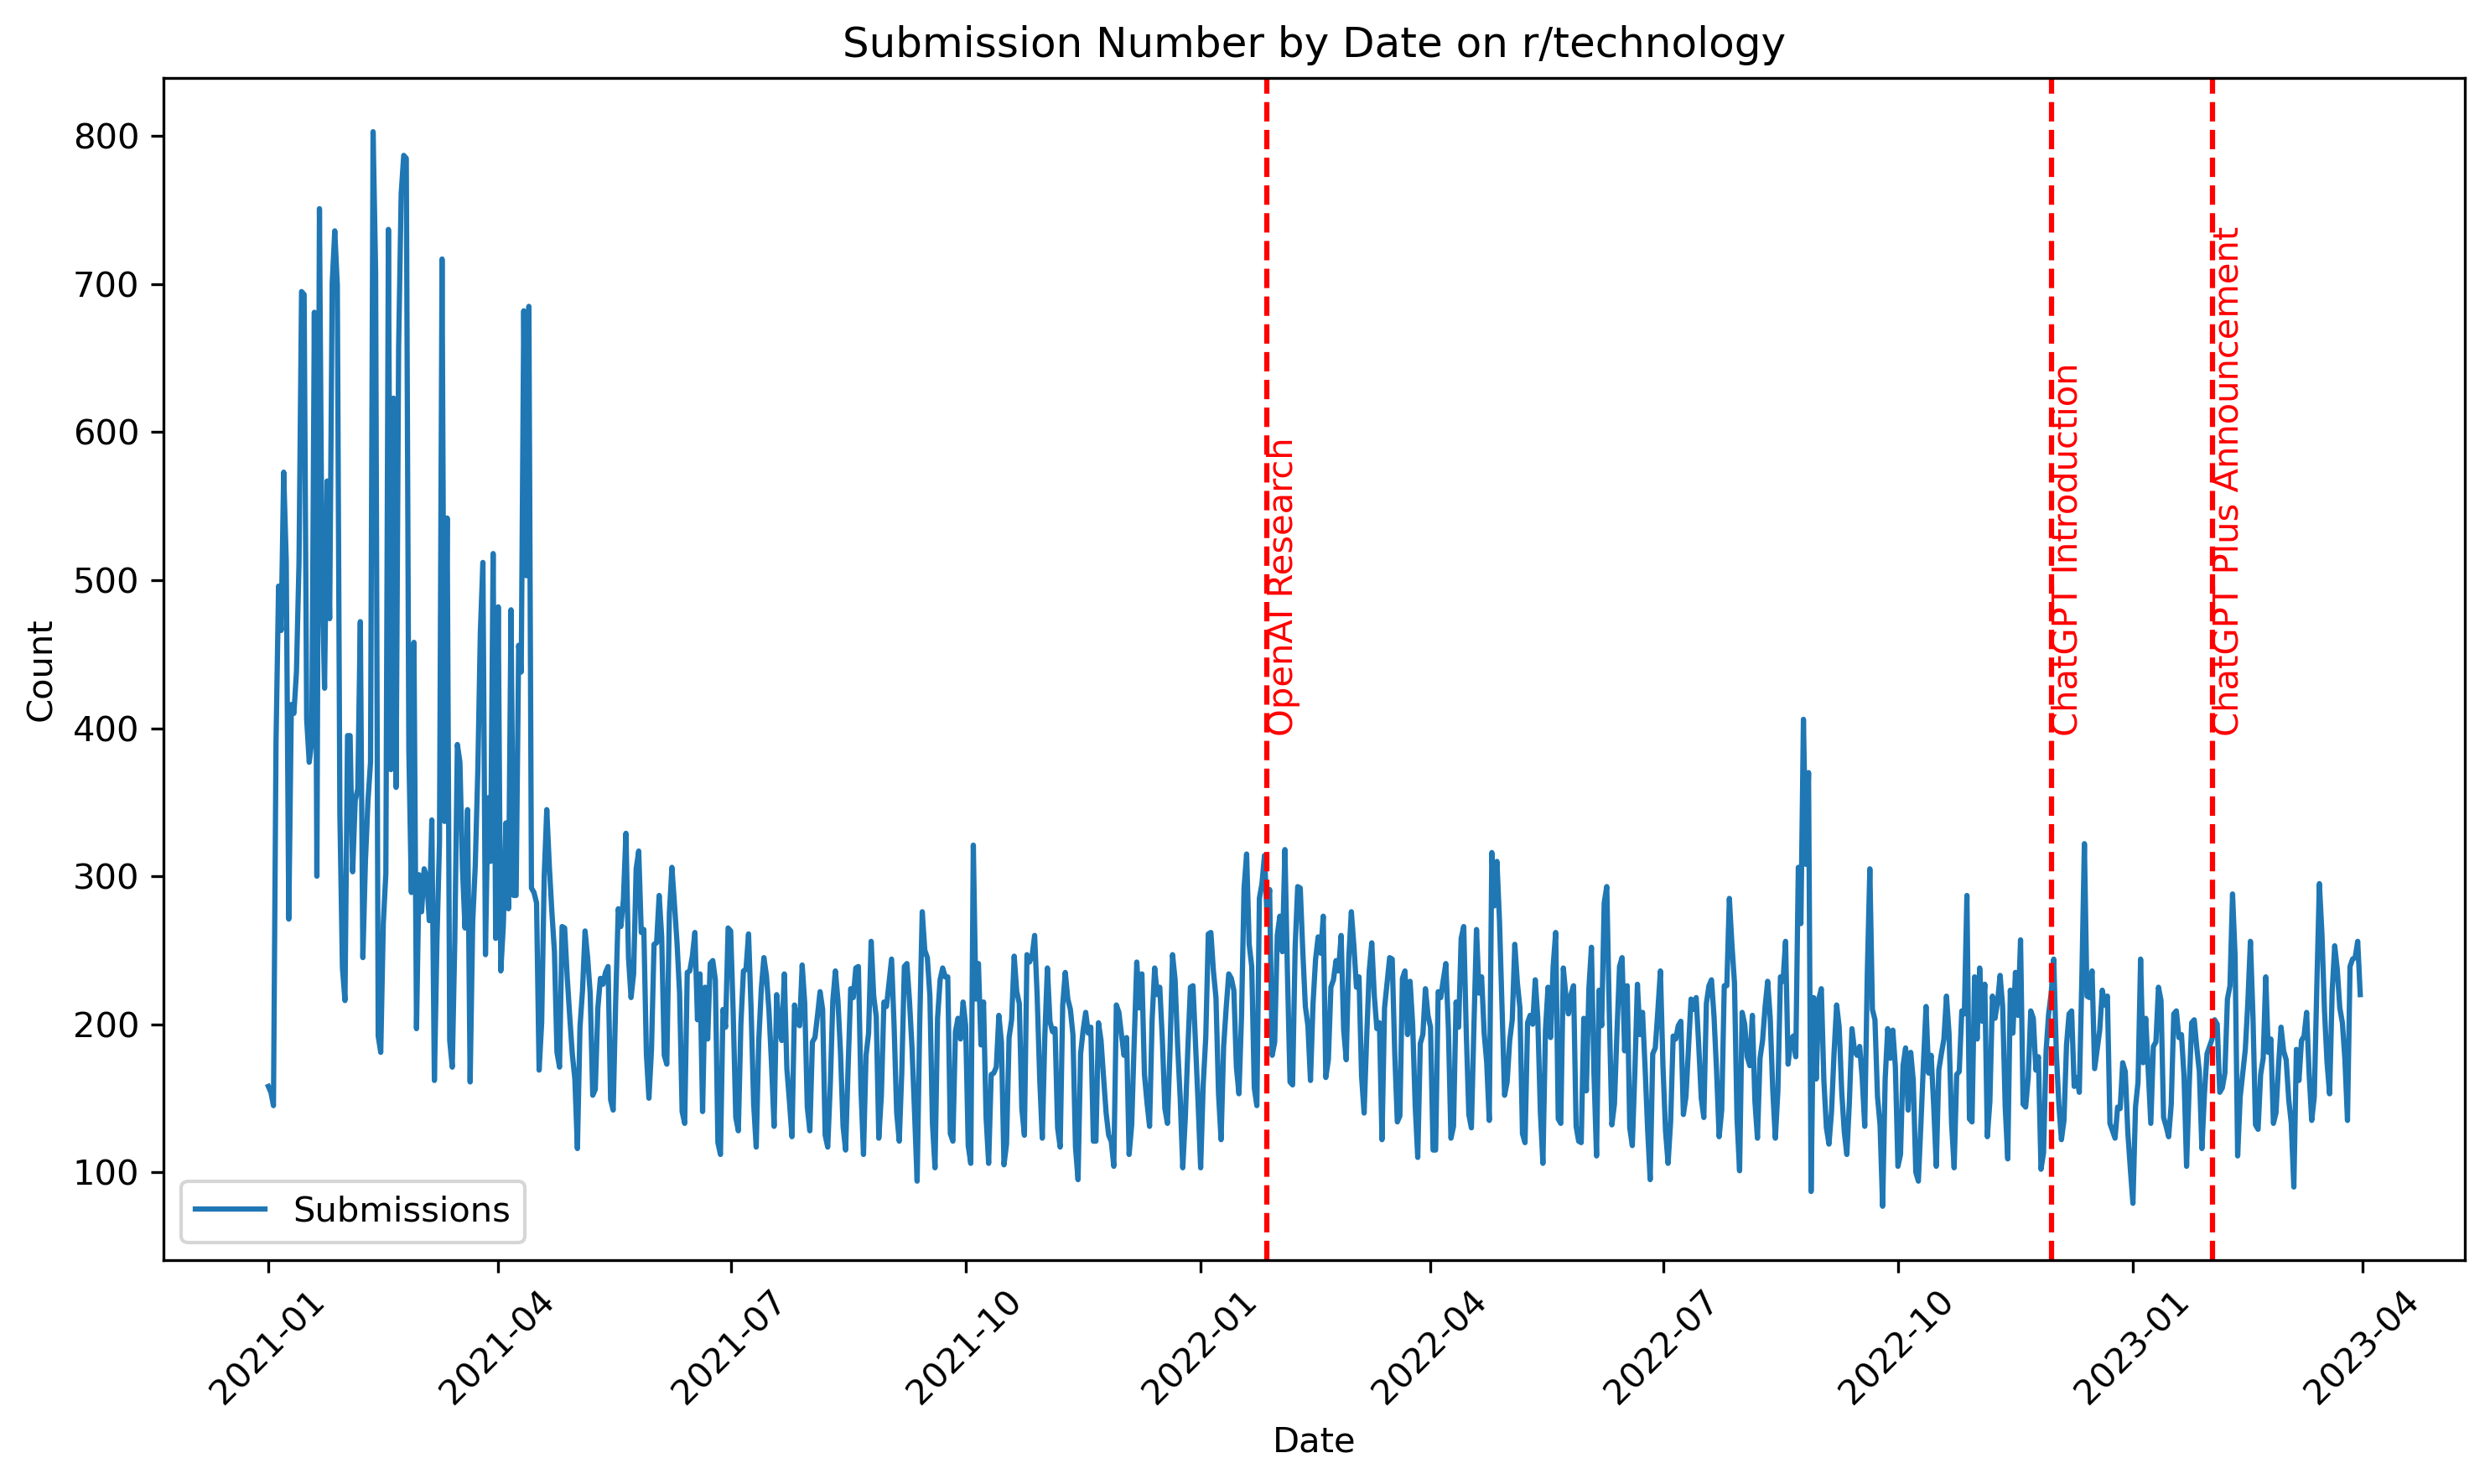

In [30]:
plt.figure(figsize=(10, 6))
plt.rcParams["figure.dpi"] = 300

# Plot submissions
plt.plot(tech_date_df1['created_date'], tech_date_df1['subs_count'], label='Submissions')

# Add vertical lines for significant events
plt.axvline(x=pd.to_datetime('2022-01-27'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-01-27'), 400, "OpenAI Research", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2022-11-30'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-11-30'), 400, "ChatGPT Introduction", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2023-02-01'), color='red', linestyle='--')
plt.text(pd.to_datetime('2023-02-01'), 400, "ChatGPT Plus Announcement", color='red', rotation=90)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Submission Number by Date on r/technology')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

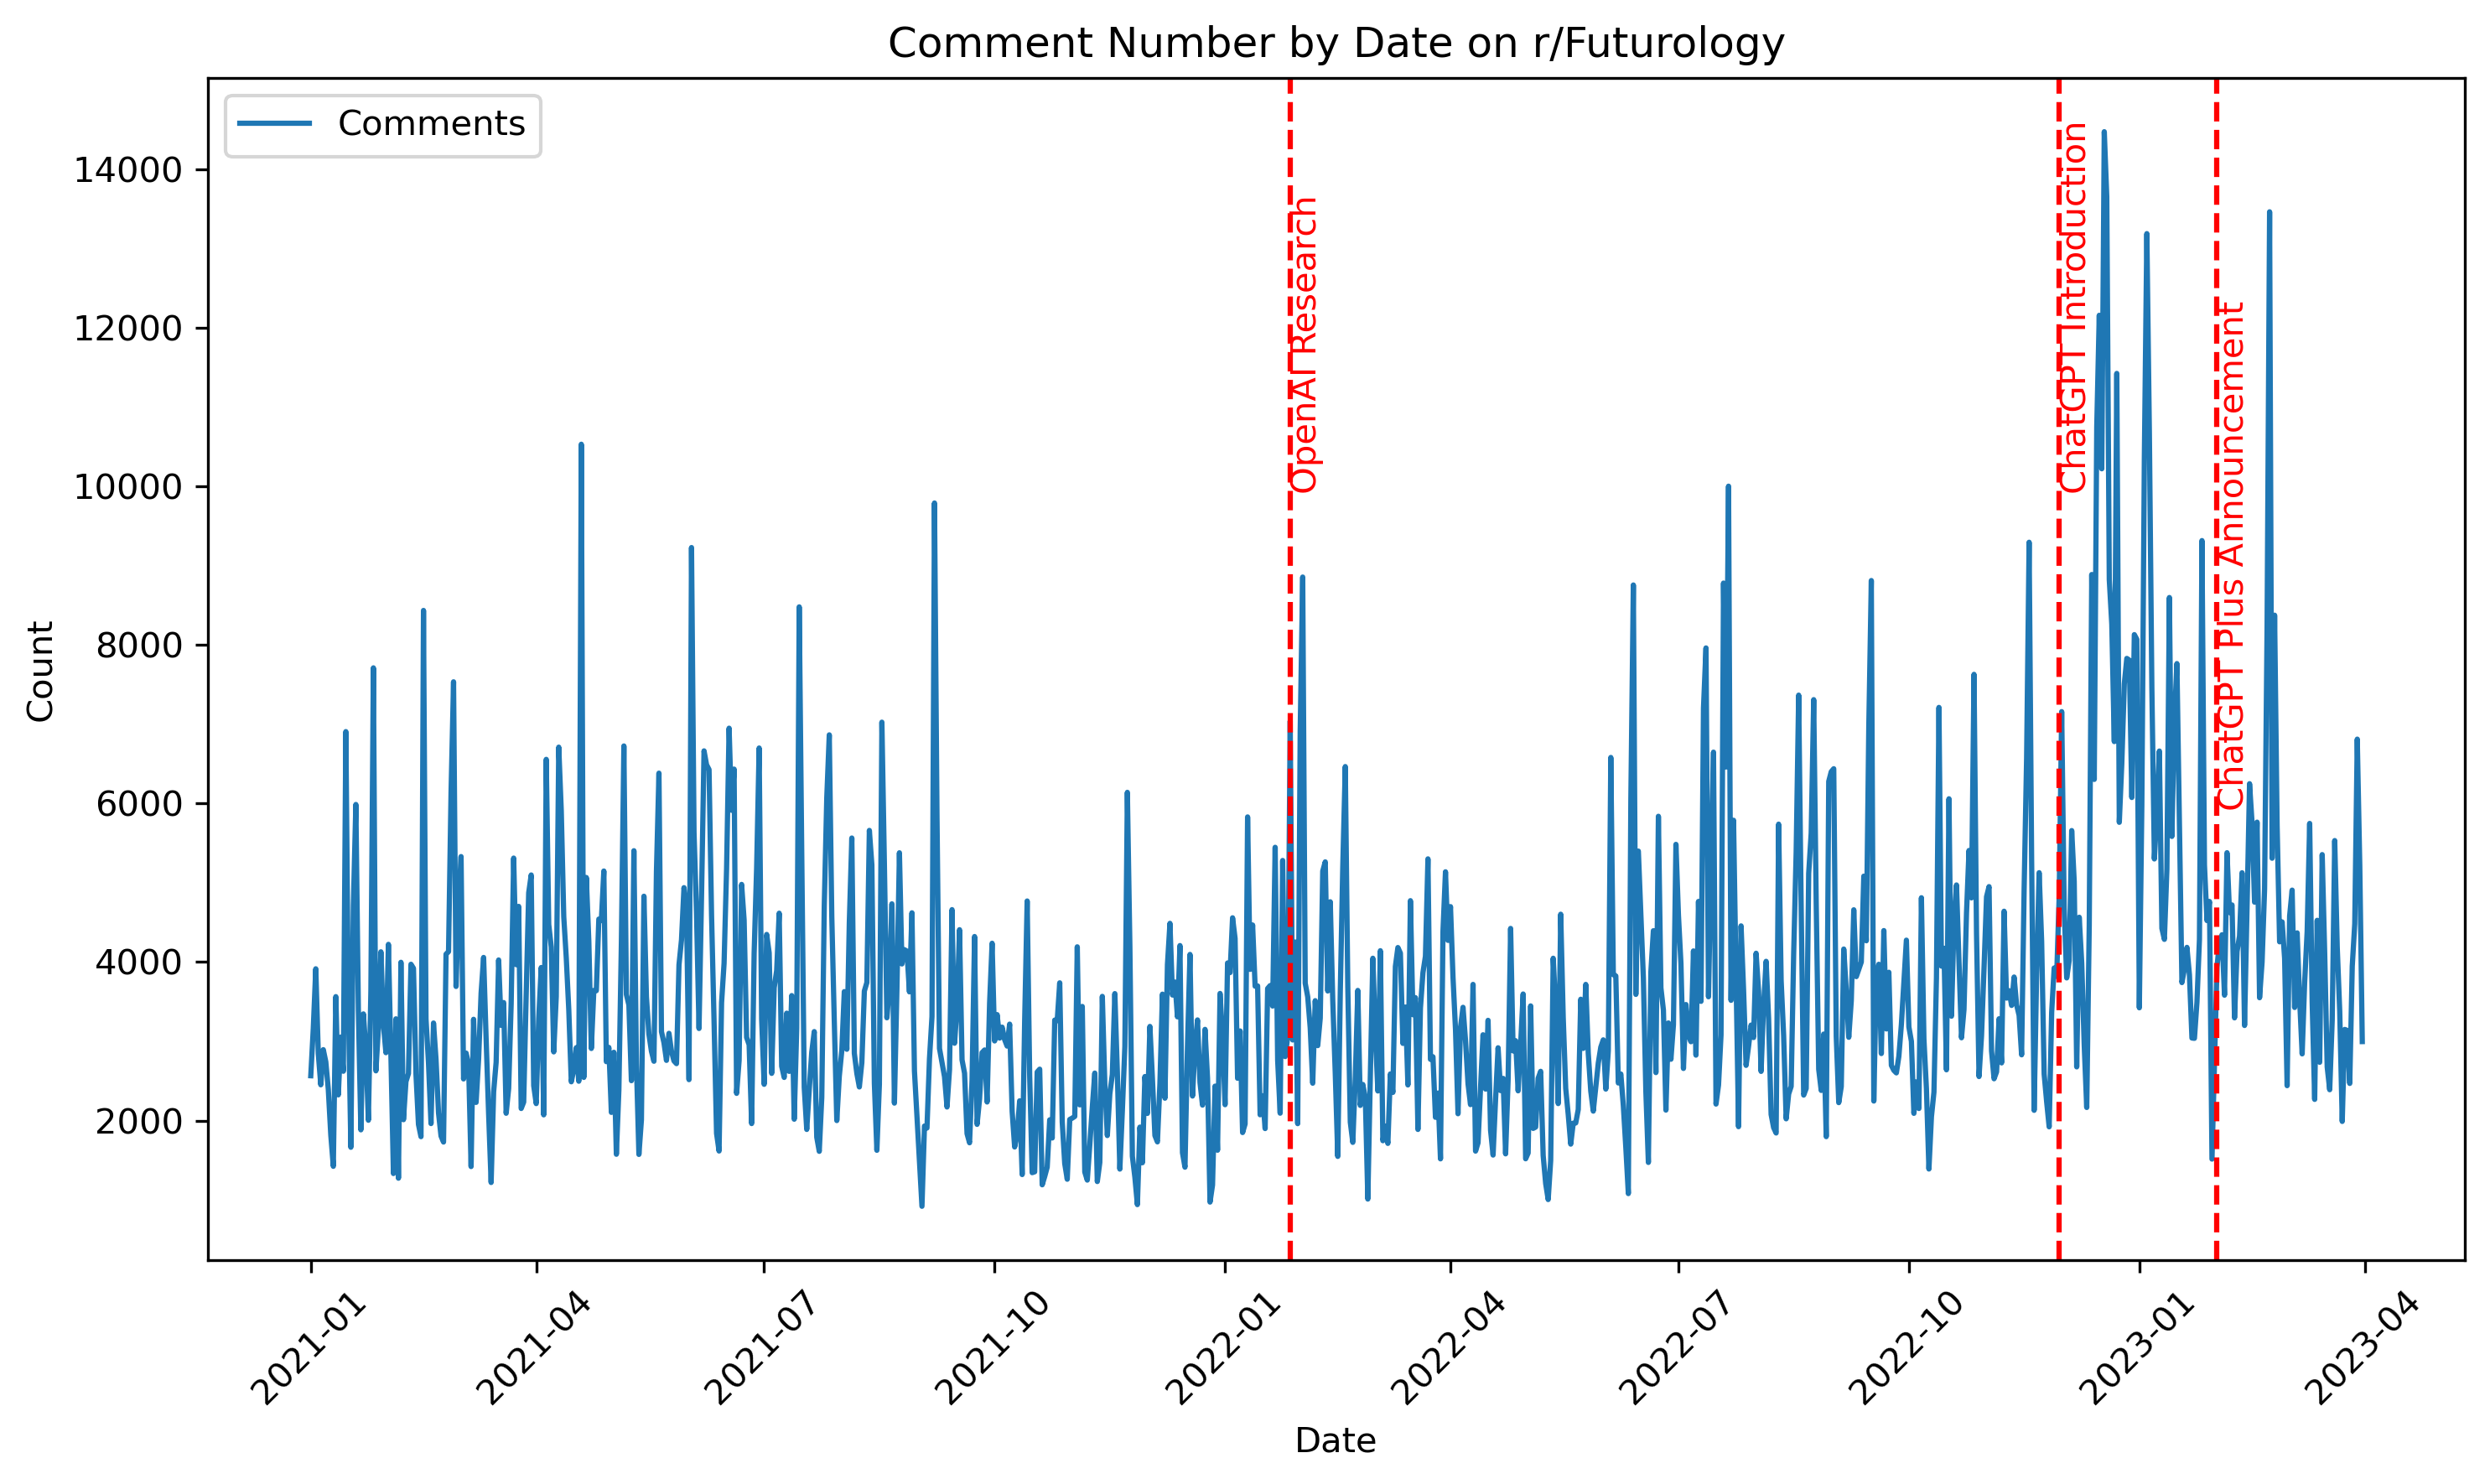

In [19]:
futu_date_df1 = futu_date_df.reset_index()
# Convert 'created_date' column to datetime
futu_date_df1['created_date'] = pd.to_datetime(futu_date_df1['created_date'])

# Sort the DataFrame by 'created_date' column
futu_date_df1 = futu_date_df1.sort_values(by='created_date')

plt.figure(figsize=(10, 6))
plt.rcParams["figure.dpi"] = 300

# Plot submissions
#plt.plot(tech_date_df1['created_date'], tech_date_df1['subs_count'], label='Submissions')

# Plot comments
plt.plot(futu_date_df1['created_date'], futu_date_df1['comments_count'], label='Comments')

# Add vertical lines for significant events
plt.axvline(x=pd.to_datetime('2022-01-27'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-01-27'), 10000, "OpenAI Research", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2022-11-30'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-11-30'), 10000, "ChatGPT Introduction", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2023-02-01'), color='red', linestyle='--')
plt.text(pd.to_datetime('2023-02-01'), 6000, "ChatGPT Plus Announcement", color='red', rotation=90)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comment Number by Date on r/Futurology')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

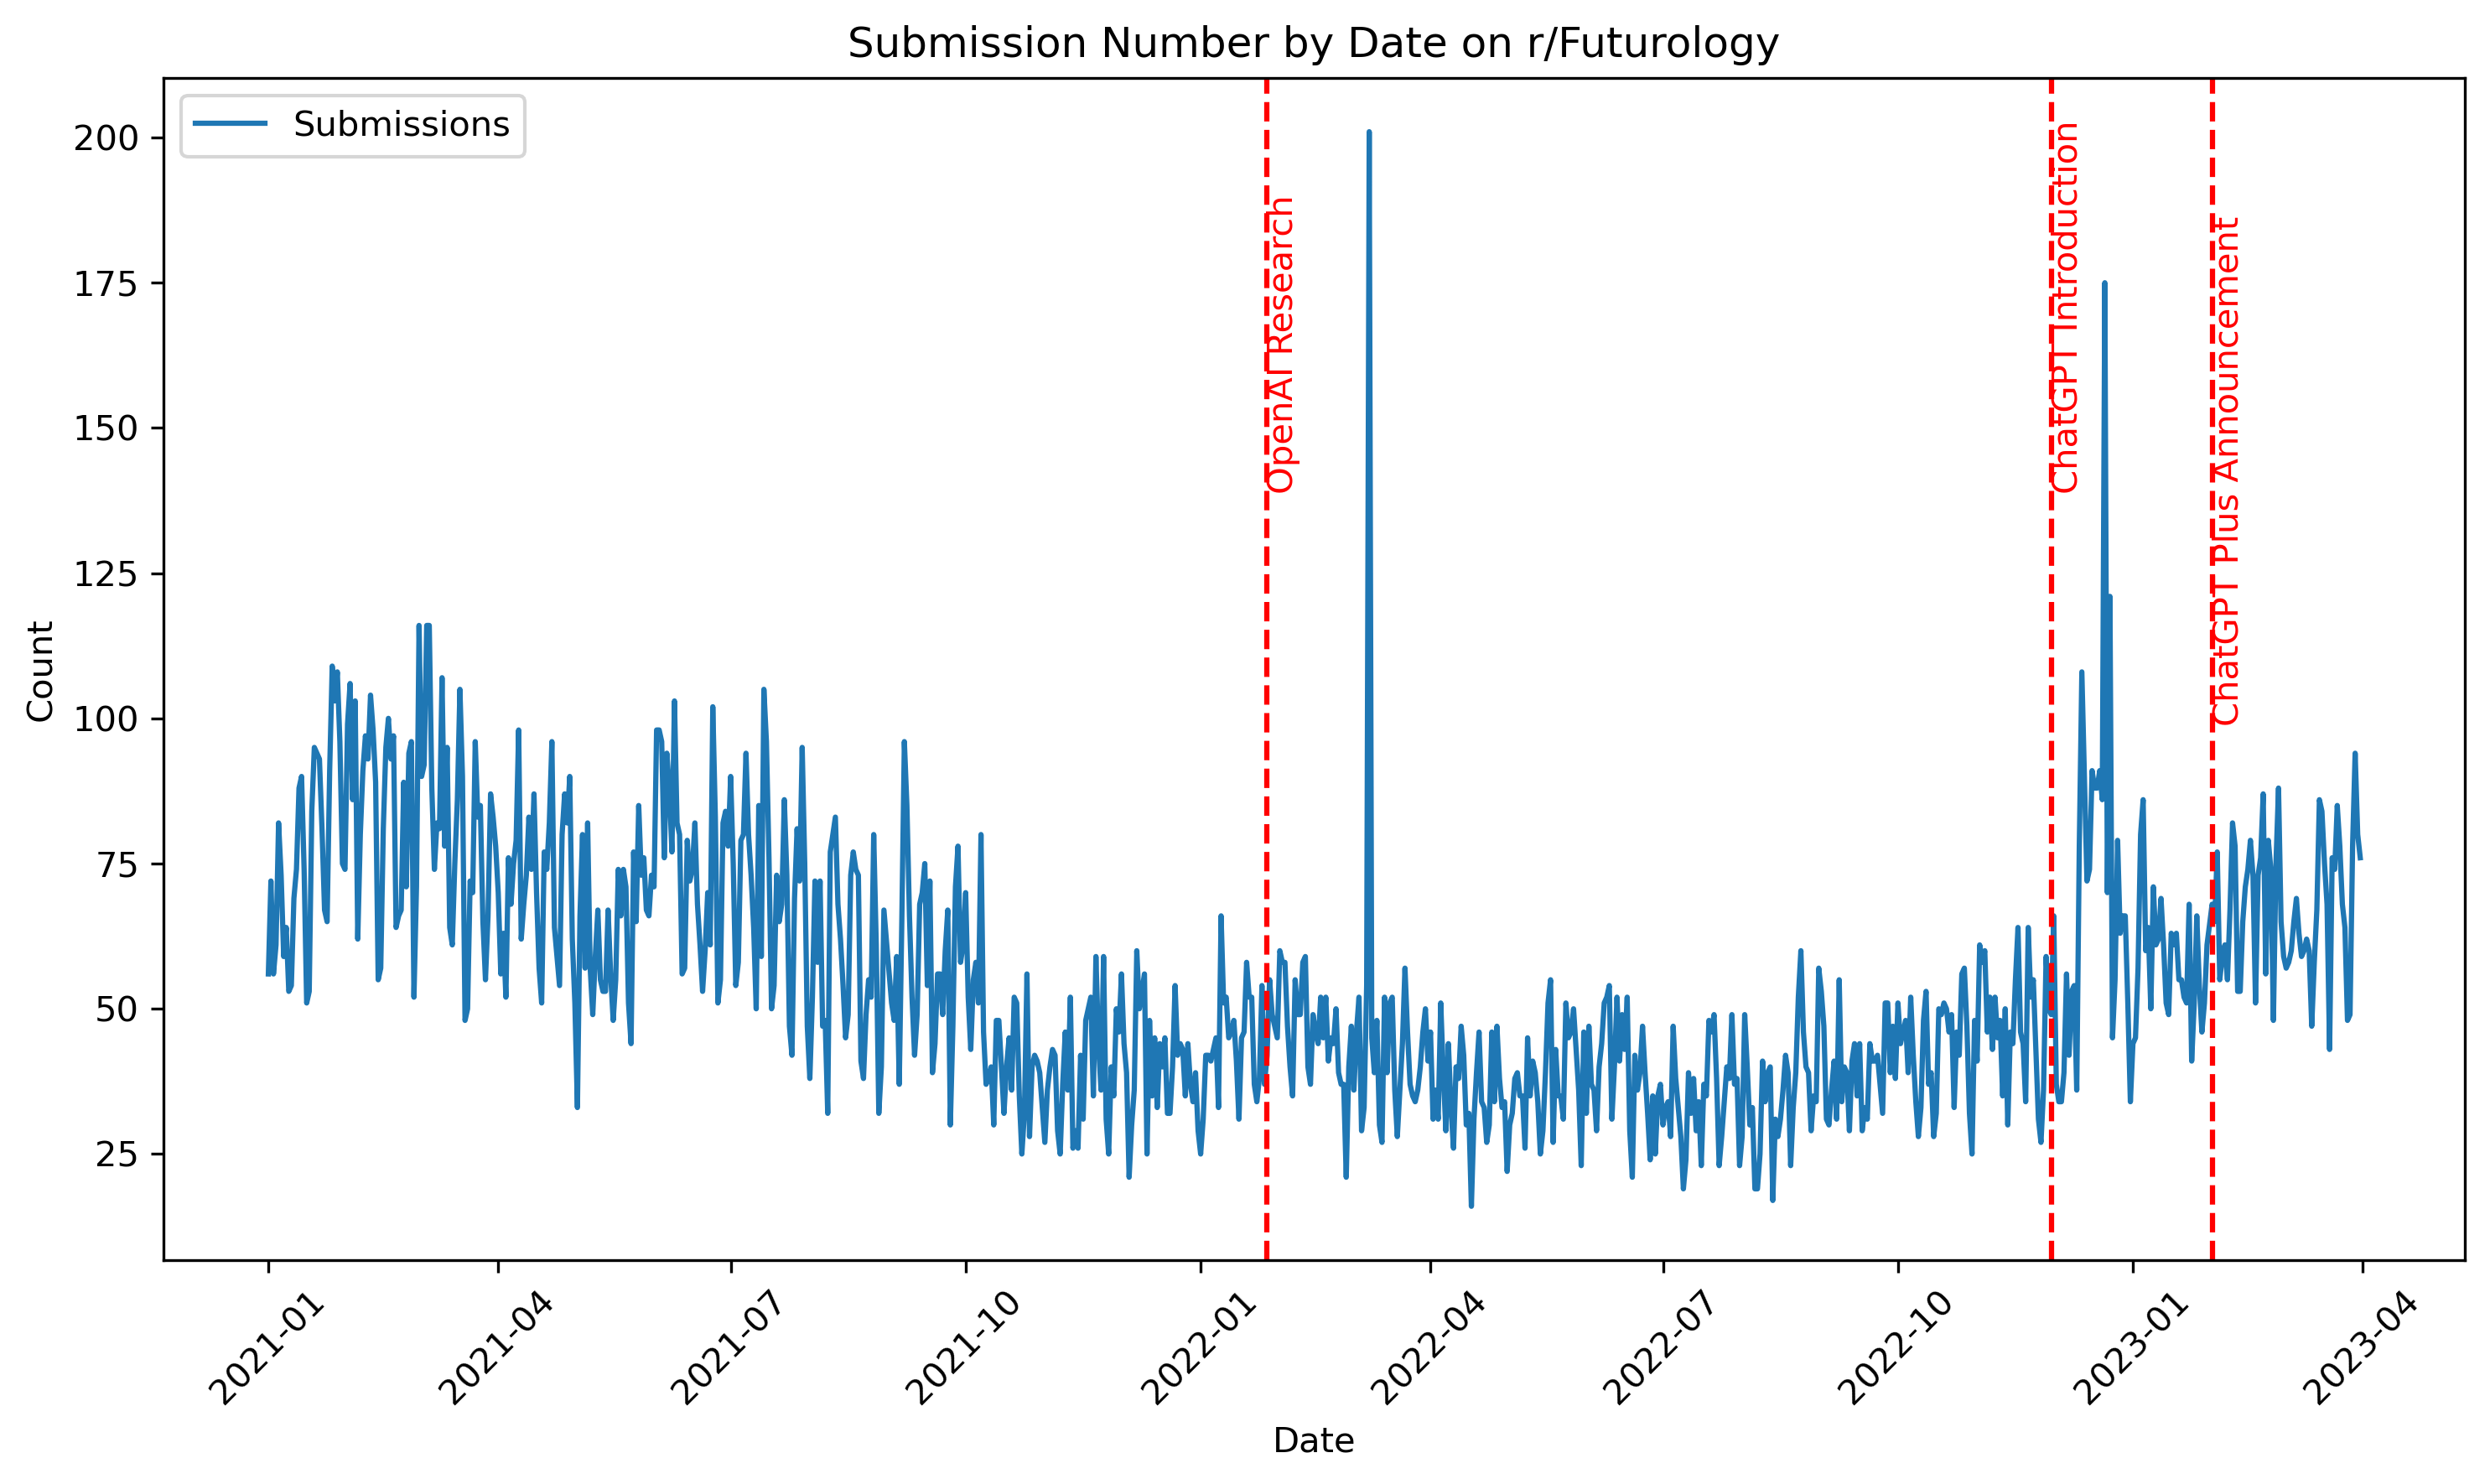

In [23]:
plt.figure(figsize=(10, 6))
plt.rcParams["figure.dpi"] = 300

# Plot submissions
plt.plot(futu_date_df1['created_date'], futu_date_df1['subs_count'], label='Submissions')

# Add vertical lines for significant events
plt.axvline(x=pd.to_datetime('2022-01-27'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-01-27'), 140, "OpenAI Research", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2022-11-30'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-11-30'), 140, "ChatGPT Introduction", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2023-02-01'), color='red', linestyle='--')
plt.text(pd.to_datetime('2023-02-01'), 100, "ChatGPT Plus Announcement", color='red', rotation=90)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Submission Number by Date on r/Futurology')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Exploring Stock Price Trends of Top 5 Tech Companies (January 2021 - February 2023)
In this section, we delve into the stock price movements of prominent tech enterprises: Microsoft, Nvidia, Adobe, Alphabet, and Amazon, renowned for their global influence. Our objective is to analyze the variations in their stock values from January 2021 to February 2023. Moreover, we scrutinize the influence of notable occurrences, such as the introduction of ChatGPT 3.5, on the stock performance of these market leaders.

In [83]:
pip install yfinance

  Using cached yfinance-0.2.37-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached frozendict-2.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (23 kB)
  Using cached peewee-3.17.1-cp310-cp310-linux_x86_64.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.37-py2.py3-none-any.whl (72 kB)
Using cached frozendict-2.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (116 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that

In [84]:
import yfinance as yf

# Define the list of companies
companies = ['MSFT', 'NVDA', 'ADBE', 'GOOGL', 'AMZN']

# Fetch historical stock data for each company
start_date = '2021-01-01'
end_date = '2023-02-28'

stock_data = {}
for company in companies:
    stock_data[company] = yf.download(company, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame to store the adjusted closing prices
df = pd.DataFrame(stock_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [86]:
df.to_csv("Tech_Stock.csv",index=True)

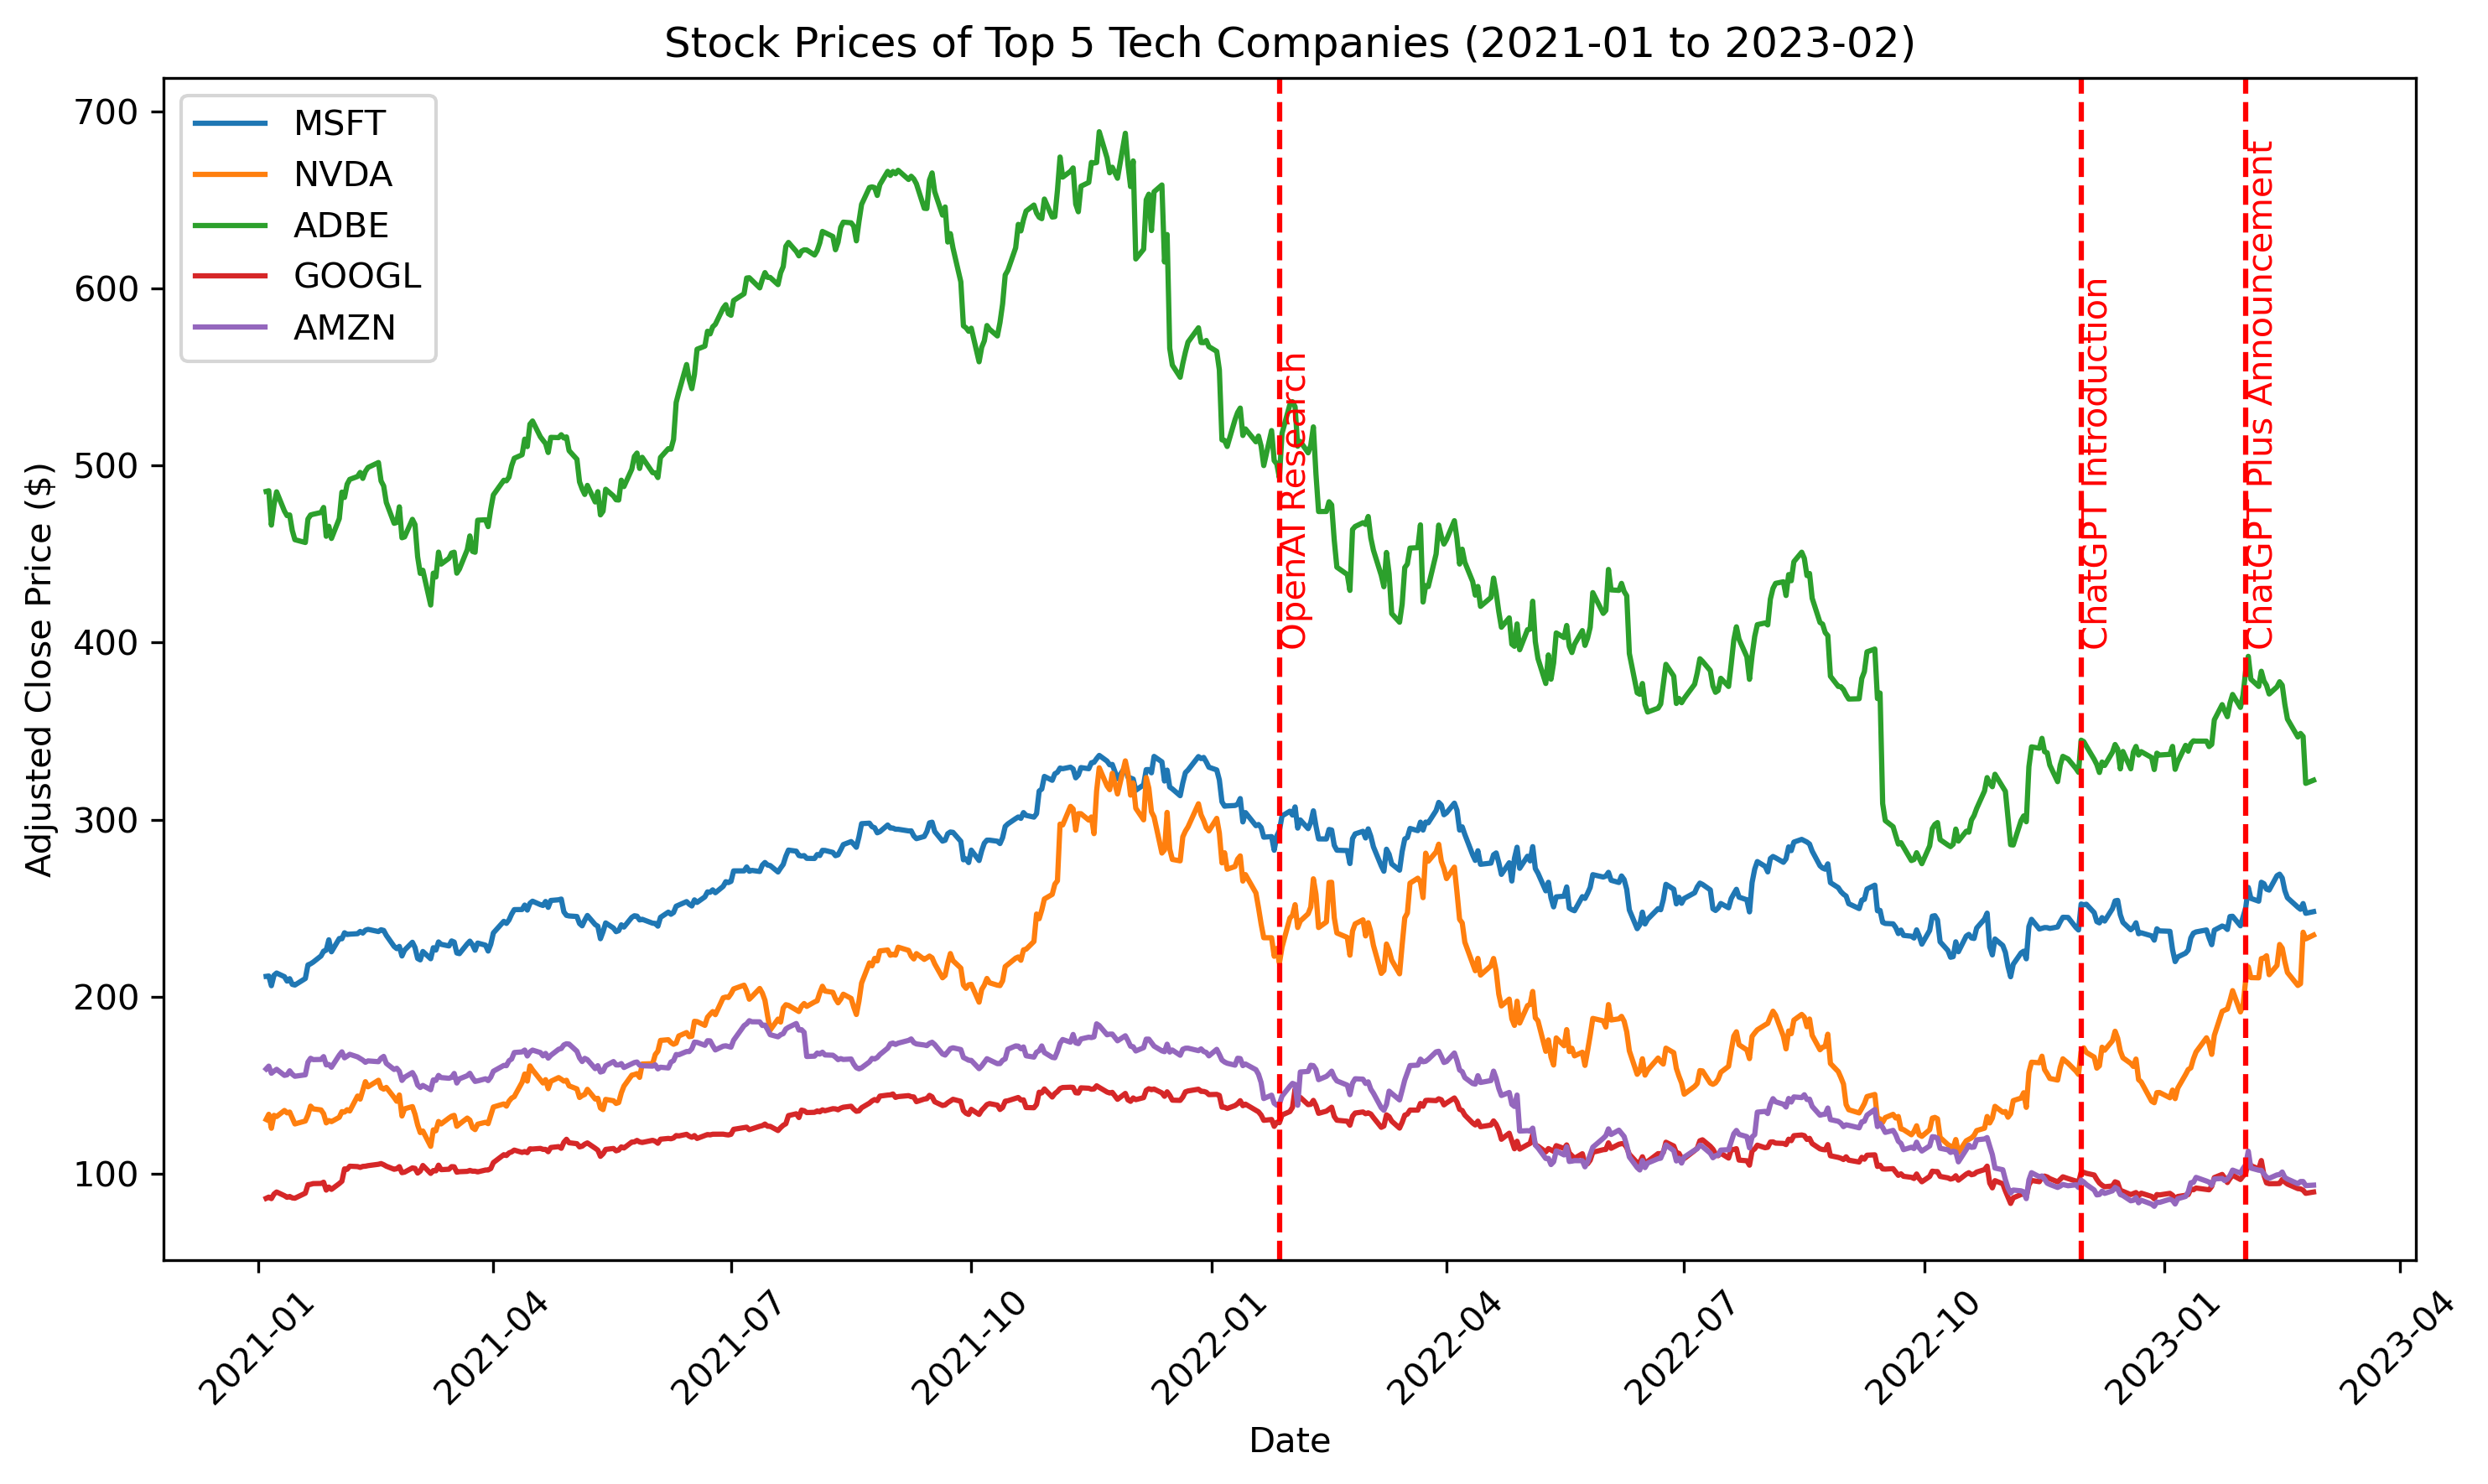

In [87]:
# Plot the stock prices
plt.figure(figsize=(10, 6))
for company in companies:
    plt.plot(df.index, df[company], label=company)

plt.title('Stock Prices of Top 5 Tech Companies (2021-01 to 2023-02)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')

# Add vertical lines for significant events
plt.axvline(x=pd.to_datetime('2022-01-27'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-01-27'), 400, "OpenAI Research", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2022-11-30'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-11-30'), 400, "ChatGPT Introduction", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2023-02-01'), color='red', linestyle='--')
plt.text(pd.to_datetime('2023-02-01'), 400, "ChatGPT Plus Announcement", color='red', rotation=90)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### 4. Exploring Technology Themes in `r/news` Subreddits

In this section, we embark on an investigation into various technological domains within the context of `r/news` subreddits. We meticulously examine eleven distinct thematic areas, including Artificial Intelligence (AI), Machine Learning (ML), Natural Language Processing (NLP), among others. Our objective is to scrutinize the distribution of both submissions and comments from January 2021 to March 2023, shedding light on the prominence of these technology-centric topics within the `r/news` community. Through this analysis, we aim to glean insights into the prevalence and engagement levels surrounding these specific technological themes within the broader news discourse.

In [130]:
ai_keywords = ['artificial intelligence', 'ai', 'chatgpt', 'gpt', 'openai', 'intelligence', 'machine intelligence', 'virtual intelligence']
ml_keywords = ['machine learning', 'ml', 'deep learning', 'neural networks', 'pattern recognition', 'predictive modeling', 'statistical learning']
nlp_keywords = ['natural language processing', 'nlp', 'large language model', 'language understanding', 'text analysis', 'speech recognition']
vision_keywords = ['computer vision', 'visual recognition', 'image processing', 'object detection', 'scene understanding']
robotics_keywords = ['robotics', 'autonomous vehicles', 'self-driving cars', 'robotic systems', 'automated vehicles']
assistant_keywords = ['virtual assistants', 'chatbots', 'conversation agents', 'automated helpers']
analytics_keywords = ['big data analytics', 'data analysis', 'data mining', 'data insights']
cloud_keywords = ['cloud computing', 'cloud services', 'cloud platforms', 'cloud infrastructure']
edge_keywords = ['edge computing', 'edge devices', 'edge analytics', 'edge networks']
iot_keywords = ['internet of things', 'iot', 'smart devices', 'connected devices']
quantum_keywords = ['quantum computing', 'quantum algorithms', 'quantum cryptography', 'quantum networks']

In [131]:
# Combine all into a single list
keywords = (
    ai_keywords + ml_keywords + nlp_keywords + vision_keywords + 
    robotics_keywords + assistant_keywords + 
    analytics_keywords + cloud_keywords + edge_keywords + 
    iot_keywords + quantum_keywords
)

In [132]:
from pyspark.sql.functions import *

In [133]:
# Remove punctuation and special characters from the body column
cleaned_news_comments = news_comments.withColumn("cleaned_body", regexp_replace(col("body"), "[^a-zA-Z0-9\\s]", ""))

# Lowercase the text in the cleaned_body column
cleaned_news_comments = cleaned_news_comments.withColumn("cleaned_body", lower(col("cleaned_body")))

In [42]:
# Remove punctuation and special characters from the body column
cleaned_news_submissions = news_submissions.withColumn("cleaned_body", regexp_replace(col("title"), "[^a-zA-Z0-9\\s]", ""))

# Lowercase the text in the cleaned_body column
cleaned_news_submissions = cleaned_news_submissions.withColumn("cleaned_body", lower(col("cleaned_body")))

In [16]:
cleaned_news_comments.select("body","cleaned_body").show(10)

+--------------------+--------------------+
|                body|        cleaned_body|
+--------------------+--------------------+
|           Why wait?|            why wait|
|The tweet is gone...|the tweet is gone...|
|You should probab...|you should probab...|
|You wouldn't be a...|you wouldnt be ab...|
|I believe the ter...|i believe the ter...|
|Peep the video I ...|peep the video i ...|
|He's sent a viole...|hes sent a violen...|
|As much as I woul...|as much as i woul...|
|Snurchy, i think ...|snurchy i think y...|
|I’m trying not to...|im trying not to ...|
+--------------------+--------------------+
only showing top 10 rows



In [16]:
cleaned_news_submissions.select("title","cleaned_body").show(10)

+--------------------+--------------------+
|               title|        cleaned_body|
+--------------------+--------------------+
|New Warp Drive Mo...|new warp drive mo...|
|UNICAL CES admiss...|unical ces admiss...|
|Attack on Asian W...|attack on asian w...|
|'Nomadland' wins ...|nomadland wins be...|
|دانلود آهنگ کردی ...|                    |
|Ireland to promot...|ireland to promot...|
|Newspaper Mistake...|newspaper mistake...|
|River Improvement...|river improvement...|
|HOW TO SELL WITH ...|how to sell with ...|
|PayPal will let U...|paypal will let u...|
+--------------------+--------------------+
only showing top 10 rows



In [43]:
# Filter news comments for technology topics
filtered_news_comments = cleaned_news_comments.filter(
    col('cleaned_body').rlike(r'\b' + r'\b|\b'.join(keywords) + r'\b')
)

In [44]:
print(f"shape of the filtered news comments dataframe is {filtered_news_comments.count():,}x{len(filtered_news_comments.columns)}") 

shape of the filtered news comments dataframe is 31,402x26


In [44]:
# Filter news comments for technology topics
filtered_news_submissions = cleaned_news_submissions.filter(
    col('cleaned_body').rlike(r'\b' + r'\b|\b'.join(keywords) + r'\b')
)

In [18]:
print(f"shape of the filtered news submissions dataframe is {filtered_news_submissions.count():,}x{len(filtered_news_submissions.columns)}") 

shape of the filtered news submissions dataframe is 2,700x71


In [19]:
# Define functions to check if any keywords are present in the cleaned_body column
def contains_ai(body):
    return any(word in body.split() for word in ai_keywords)

def contains_ml(body):
    return any(word in body.split() for word in ml_keywords)

def contains_nlp(body):
    return any(word in body.split() for word in nlp_keywords)

def contains_vision(body):
    return any(word in body.split() for word in vision_keywords)

def contains_robotics(body):
    return any(word in body.split() for word in robotics_keywords)

def contains_assistant(body):
    return any(word in body.split() for word in assistant_keywords)

def contains_analytics(body):
    return any(word in body.split() for word in analytics_keywords)

def contains_cloud(body):
    return any(word in body.split() for word in cloud_keywords)

def contains_edge(body):
    return any(word in body.split() for word in edge_keywords)

def contains_iot(body):
    return any(word in body.split() for word in iot_keywords)

def contains_quantum(body):
    return any(word in body.split() for word in quantum_keywords)

In [20]:
from pyspark.sql.types import BooleanType
# Define UDFs for the functions
contains_ai_udf = udf(contains_ai, BooleanType())
contains_ml_udf = udf(contains_ml, BooleanType())
contains_nlp_udf = udf(contains_nlp, BooleanType())
contains_vision_udf = udf(contains_vision, BooleanType())
contains_robotics_udf = udf(contains_robotics, BooleanType())
contains_assistant_udf = udf(contains_assistant, BooleanType())
contains_analytics_udf = udf(contains_analytics, BooleanType())
contains_cloud_udf = udf(contains_cloud, BooleanType())
contains_edge_udf = udf(contains_edge, BooleanType())
contains_iot_udf = udf(contains_iot, BooleanType())
contains_quantum_udf = udf(contains_quantum, BooleanType())

In [27]:
# Add dummy variables based on keywords
filtered_news_comments = filtered_news_comments.withColumn("contains_ai", contains_ai_udf(filtered_news_comments['cleaned_body']))
filtered_news_comments = filtered_news_comments.withColumn("contains_ml", contains_ml_udf(filtered_news_comments['cleaned_body']))
filtered_news_comments = filtered_news_comments.withColumn("contains_nlp", contains_nlp_udf(filtered_news_comments['cleaned_body']))
filtered_news_comments = filtered_news_comments.withColumn("contains_vision", contains_vision_udf(filtered_news_comments['cleaned_body']))
filtered_news_comments = filtered_news_comments.withColumn("contains_robotics", contains_robotics_udf(filtered_news_comments['cleaned_body']))
filtered_news_comments = filtered_news_comments.withColumn("contains_assistant", contains_assistant_udf(filtered_news_comments['cleaned_body']))
filtered_news_comments = filtered_news_comments.withColumn("contains_analytics", contains_analytics_udf(filtered_news_comments['cleaned_body']))
filtered_news_comments = filtered_news_comments.withColumn("contains_cloud", contains_cloud_udf(filtered_news_comments['cleaned_body']))
filtered_news_comments = filtered_news_comments.withColumn("contains_edge", contains_edge_udf(filtered_news_comments['cleaned_body']))
filtered_news_comments = filtered_news_comments.withColumn("contains_iot", contains_iot_udf(filtered_news_comments['cleaned_body']))
filtered_news_comments = filtered_news_comments.withColumn("contains_quantum", contains_quantum_udf(filtered_news_comments['cleaned_body']))

# Subset DataFrame based on keywords
#ai_comments = filtered_news_comments.filter(col("contains_ai"))
#ml_comments = filtered_news_comments.filter(col("contains_ml"))
#nlp_comments = filtered_news_comments.filter(col("contains_nlp"))
#vision_comments = filtered_news_comments.filter(col("contains_vision"))
#robotics_comments = filtered_news_comments.filter(col("contains_robotics"))
#assistant_comments = filtered_news_comments.filter(col("contains_assistant"))
#analytics_comments = filtered_news_comments.filter(col("contains_analytics"))
#cloud_comments = filtered_news_comments.filter(col("contains_cloud"))
#edge_comments = filtered_news_comments.filter(col("contains_edge"))
#iot_comments = filtered_news_comments.filter(col("contains_iot"))
#quantum_comments = filtered_news_comments.filter(col("contains_quantum"))

In [21]:
# Add dummy variables based on keywords
filtered_news_submissions = filtered_news_submissions.withColumn("contains_ai", contains_ai_udf(filtered_news_submissions['cleaned_body']))
filtered_news_submissions = filtered_news_submissions.withColumn("contains_ml", contains_ml_udf(filtered_news_submissions['cleaned_body']))
filtered_news_submissions = filtered_news_submissions.withColumn("contains_nlp", contains_nlp_udf(filtered_news_submissions['cleaned_body']))
filtered_news_submissions = filtered_news_submissions.withColumn("contains_vision", contains_vision_udf(filtered_news_submissions['cleaned_body']))
filtered_news_submissions = filtered_news_submissions.withColumn("contains_robotics", contains_robotics_udf(filtered_news_submissions['cleaned_body']))
filtered_news_submissions = filtered_news_submissions.withColumn("contains_assistant", contains_assistant_udf(filtered_news_submissions['cleaned_body']))
filtered_news_submissions = filtered_news_submissions.withColumn("contains_analytics", contains_analytics_udf(filtered_news_submissions['cleaned_body']))
filtered_news_submissions = filtered_news_submissions.withColumn("contains_cloud", contains_cloud_udf(filtered_news_submissions['cleaned_body']))
filtered_news_submissions = filtered_news_submissions.withColumn("contains_edge", contains_edge_udf(filtered_news_submissions['cleaned_body']))
filtered_news_submissions = filtered_news_submissions.withColumn("contains_iot", contains_iot_udf(filtered_news_submissions['cleaned_body']))
filtered_news_submissions = filtered_news_submissions.withColumn("contains_quantum", contains_quantum_udf(filtered_news_submissions['cleaned_body']))

In [54]:
# Group by and aggregate to count true values in each column
subset_counts = (
    filtered_news_comments
    .agg(
        sum(col("contains_ai").cast("integer")).alias("ai_count"),
        sum(col("contains_ml").cast("integer")).alias("ml_count"),
        sum(col("contains_nlp").cast("integer")).alias("nlp_count"),
        sum(col("contains_vision").cast("integer")).alias("vision_count"),
        sum(col("contains_robotics").cast("integer")).alias("robotics_count"),
        sum(col("contains_assistant").cast("integer")).alias("assistant_count"),
        sum(col("contains_analytics").cast("integer")).alias("analytics_count"),
        sum(col("contains_cloud").cast("integer")).alias("cloud_count"),
        sum(col("contains_edge").cast("integer")).alias("edge_count"),
        sum(col("contains_iot").cast("integer")).alias("iot_count"),
        sum(col("contains_quantum").cast("integer")).alias("quantum_count")
    ))

In [55]:
subset_counts.show()

+--------+--------+---------+------------+--------------+---------------+---------------+-----------+----------+---------+-------------+
|ai_count|ml_count|nlp_count|vision_count|robotics_count|assistant_count|analytics_count|cloud_count|edge_count|iot_count|quantum_count|
+--------+--------+---------+------------+--------------+---------------+---------------+-----------+----------+---------+-------------+
|   31402|      60|       12|           0|            88|             42|              0|          0|         0|        4|            0|
+--------+--------+---------+------------+--------------+---------------+---------------+-----------+----------+---------+-------------+



In [22]:
# Group by and aggregate to count true values in each column
subset_counts1 = (
    filtered_news_submissions
    .agg(
        sum(col("contains_ai").cast("integer")).alias("ai_count"),
        sum(col("contains_ml").cast("integer")).alias("ml_count"),
        sum(col("contains_nlp").cast("integer")).alias("nlp_count"),
        sum(col("contains_vision").cast("integer")).alias("vision_count"),
        sum(col("contains_robotics").cast("integer")).alias("robotics_count"),
        sum(col("contains_assistant").cast("integer")).alias("assistant_count"),
        sum(col("contains_analytics").cast("integer")).alias("analytics_count"),
        sum(col("contains_cloud").cast("integer")).alias("cloud_count"),
        sum(col("contains_edge").cast("integer")).alias("edge_count"),
        sum(col("contains_iot").cast("integer")).alias("iot_count"),
        sum(col("contains_quantum").cast("integer")).alias("quantum_count")
    ))

In [23]:
subset_counts1.show()

+--------+--------+---------+------------+--------------+---------------+---------------+-----------+----------+---------+-------------+
|ai_count|ml_count|nlp_count|vision_count|robotics_count|assistant_count|analytics_count|cloud_count|edge_count|iot_count|quantum_count|
+--------+--------+---------+------------+--------------+---------------+---------------+-----------+----------+---------+-------------+
|    2283|      69|        6|           0|            70|             30|              0|          0|         0|       93|            0|
+--------+--------+---------+------------+--------------+---------------+---------------+-----------+----------+---------+-------------+



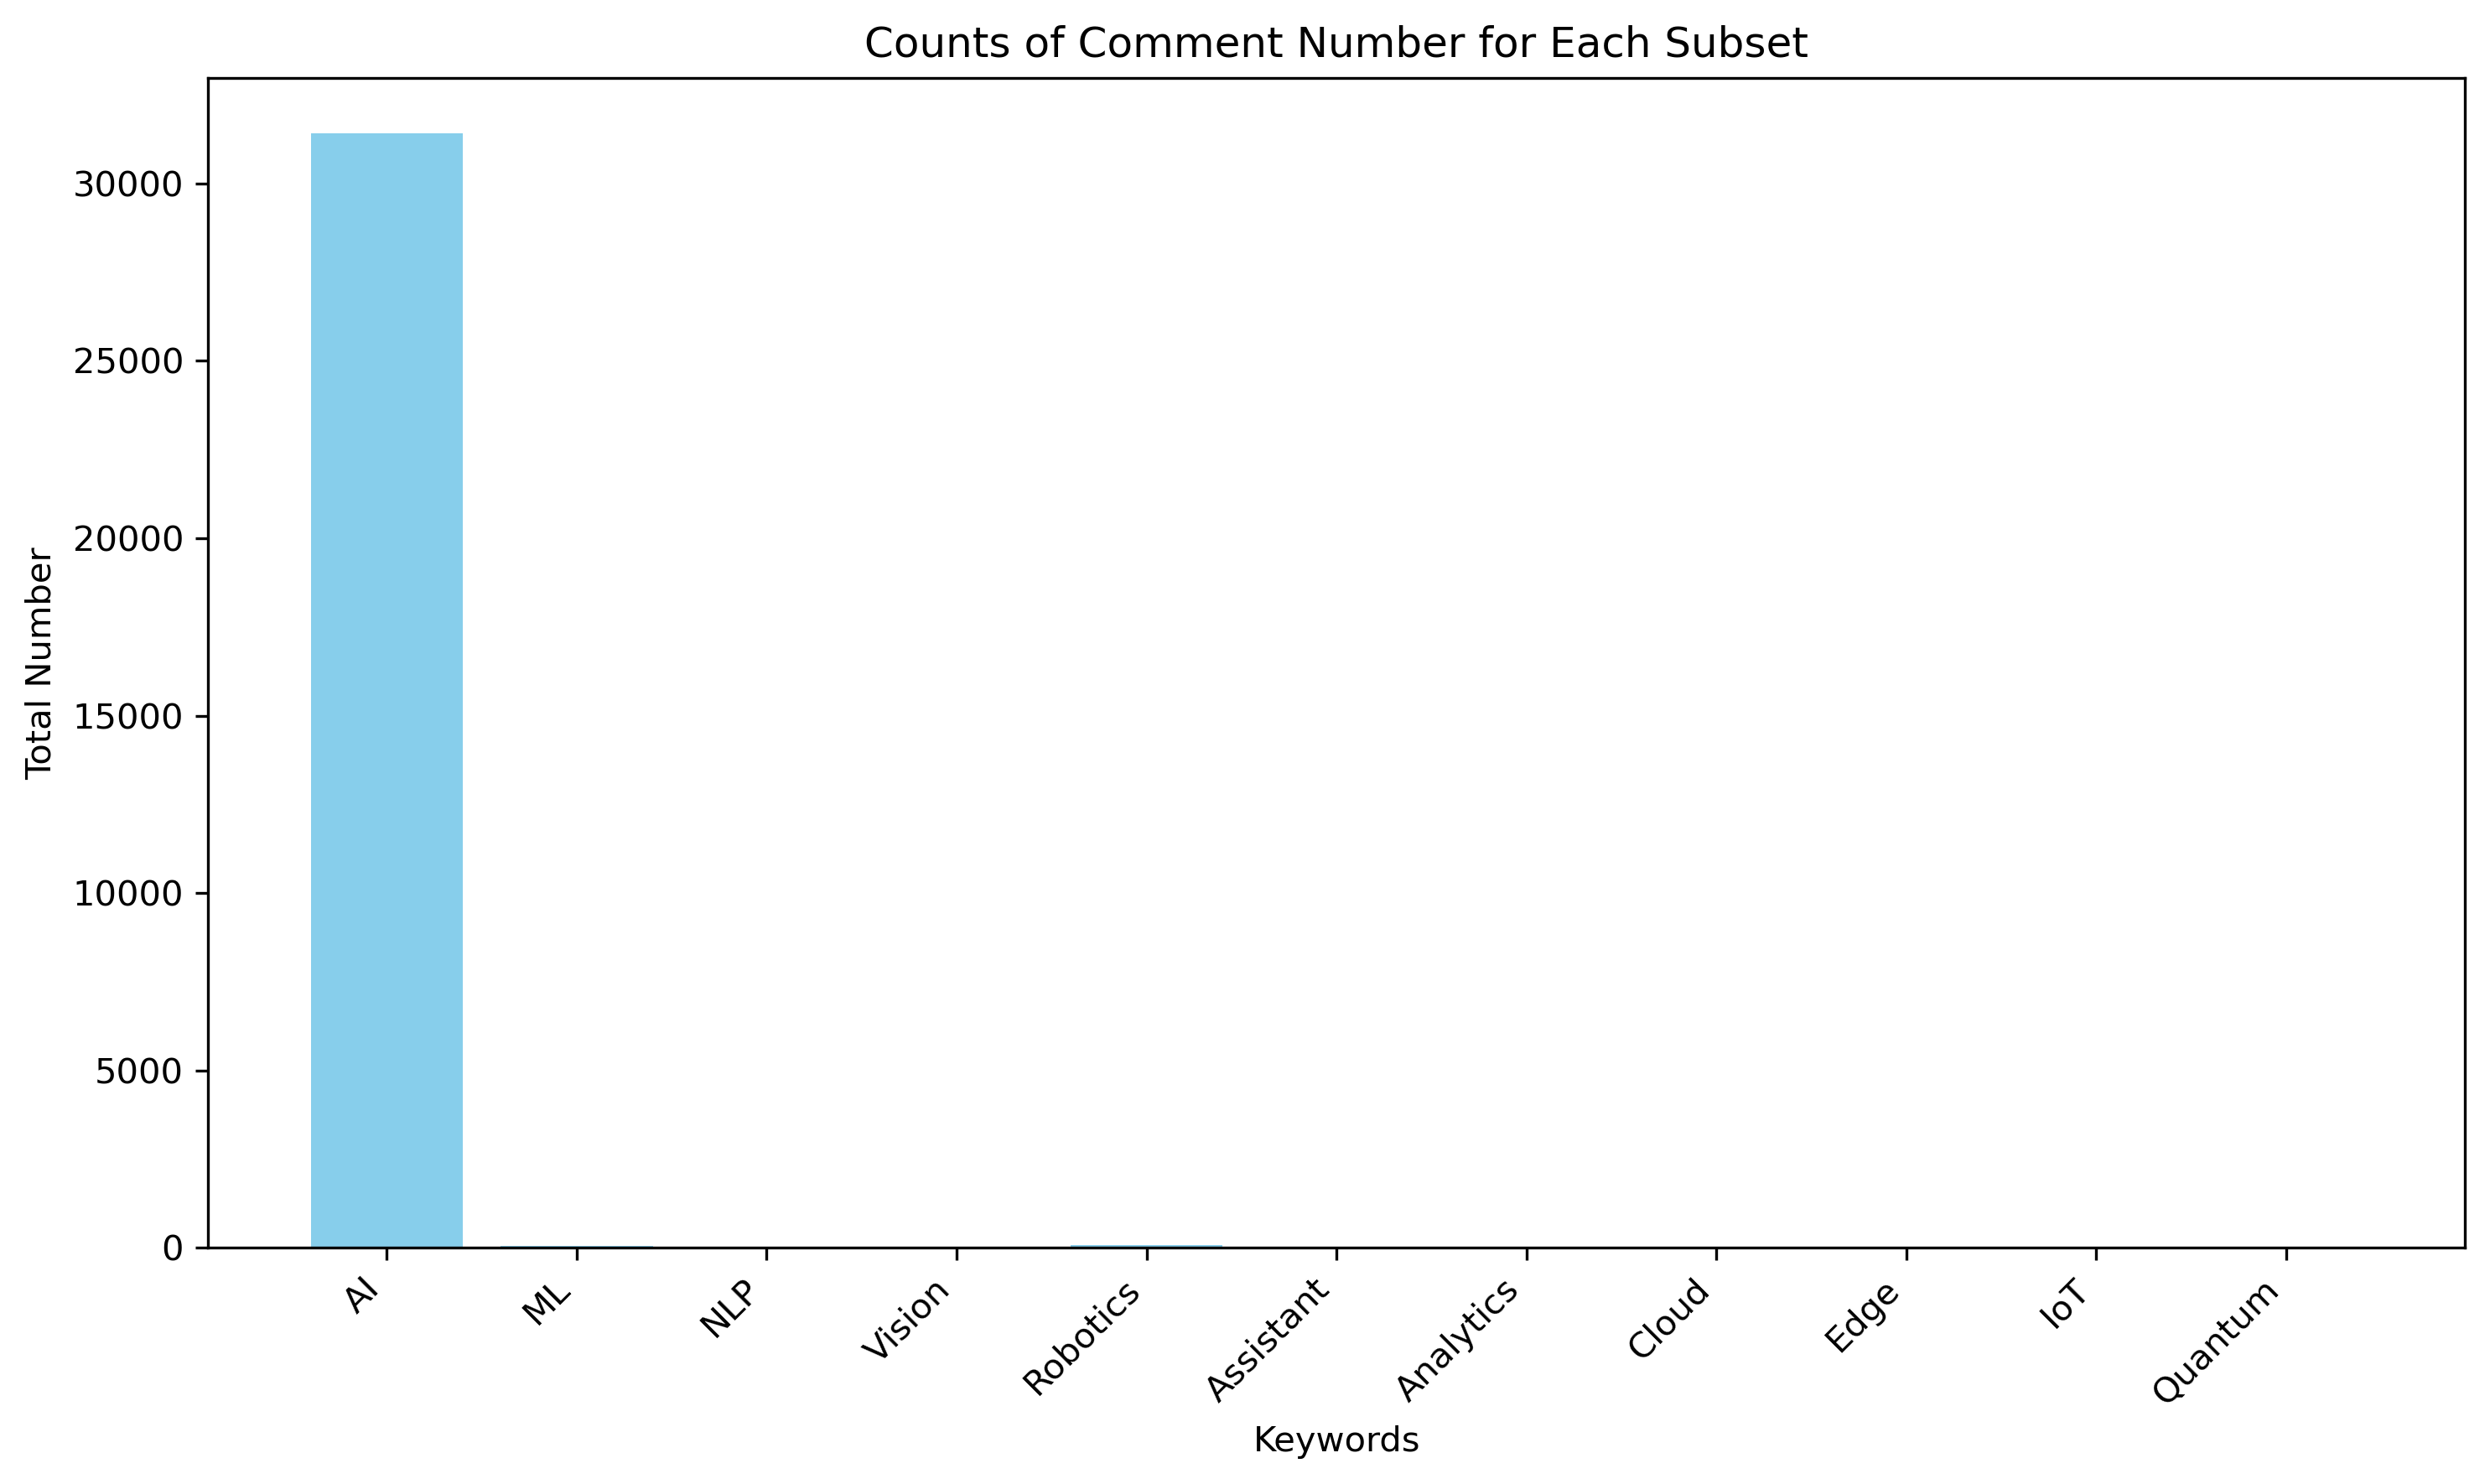

In [58]:
# Define the counts and corresponding keywords
counts = [31402, 60, 12, 0, 88, 42, 0, 0, 0, 4, 0]  
keywords = ["AI", "ML", "NLP", "Vision", "Robotics", "Assistant", "Analytics", "Cloud", "Edge", "IoT", "Quantum"]
plt.rcParams["figure.dpi"] = 300

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(keywords, counts, color='skyblue')

# Add labels and title
plt.xlabel('Keywords')
plt.ylabel('Total Number')
plt.title('Counts of Comment Number for Each Subset')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

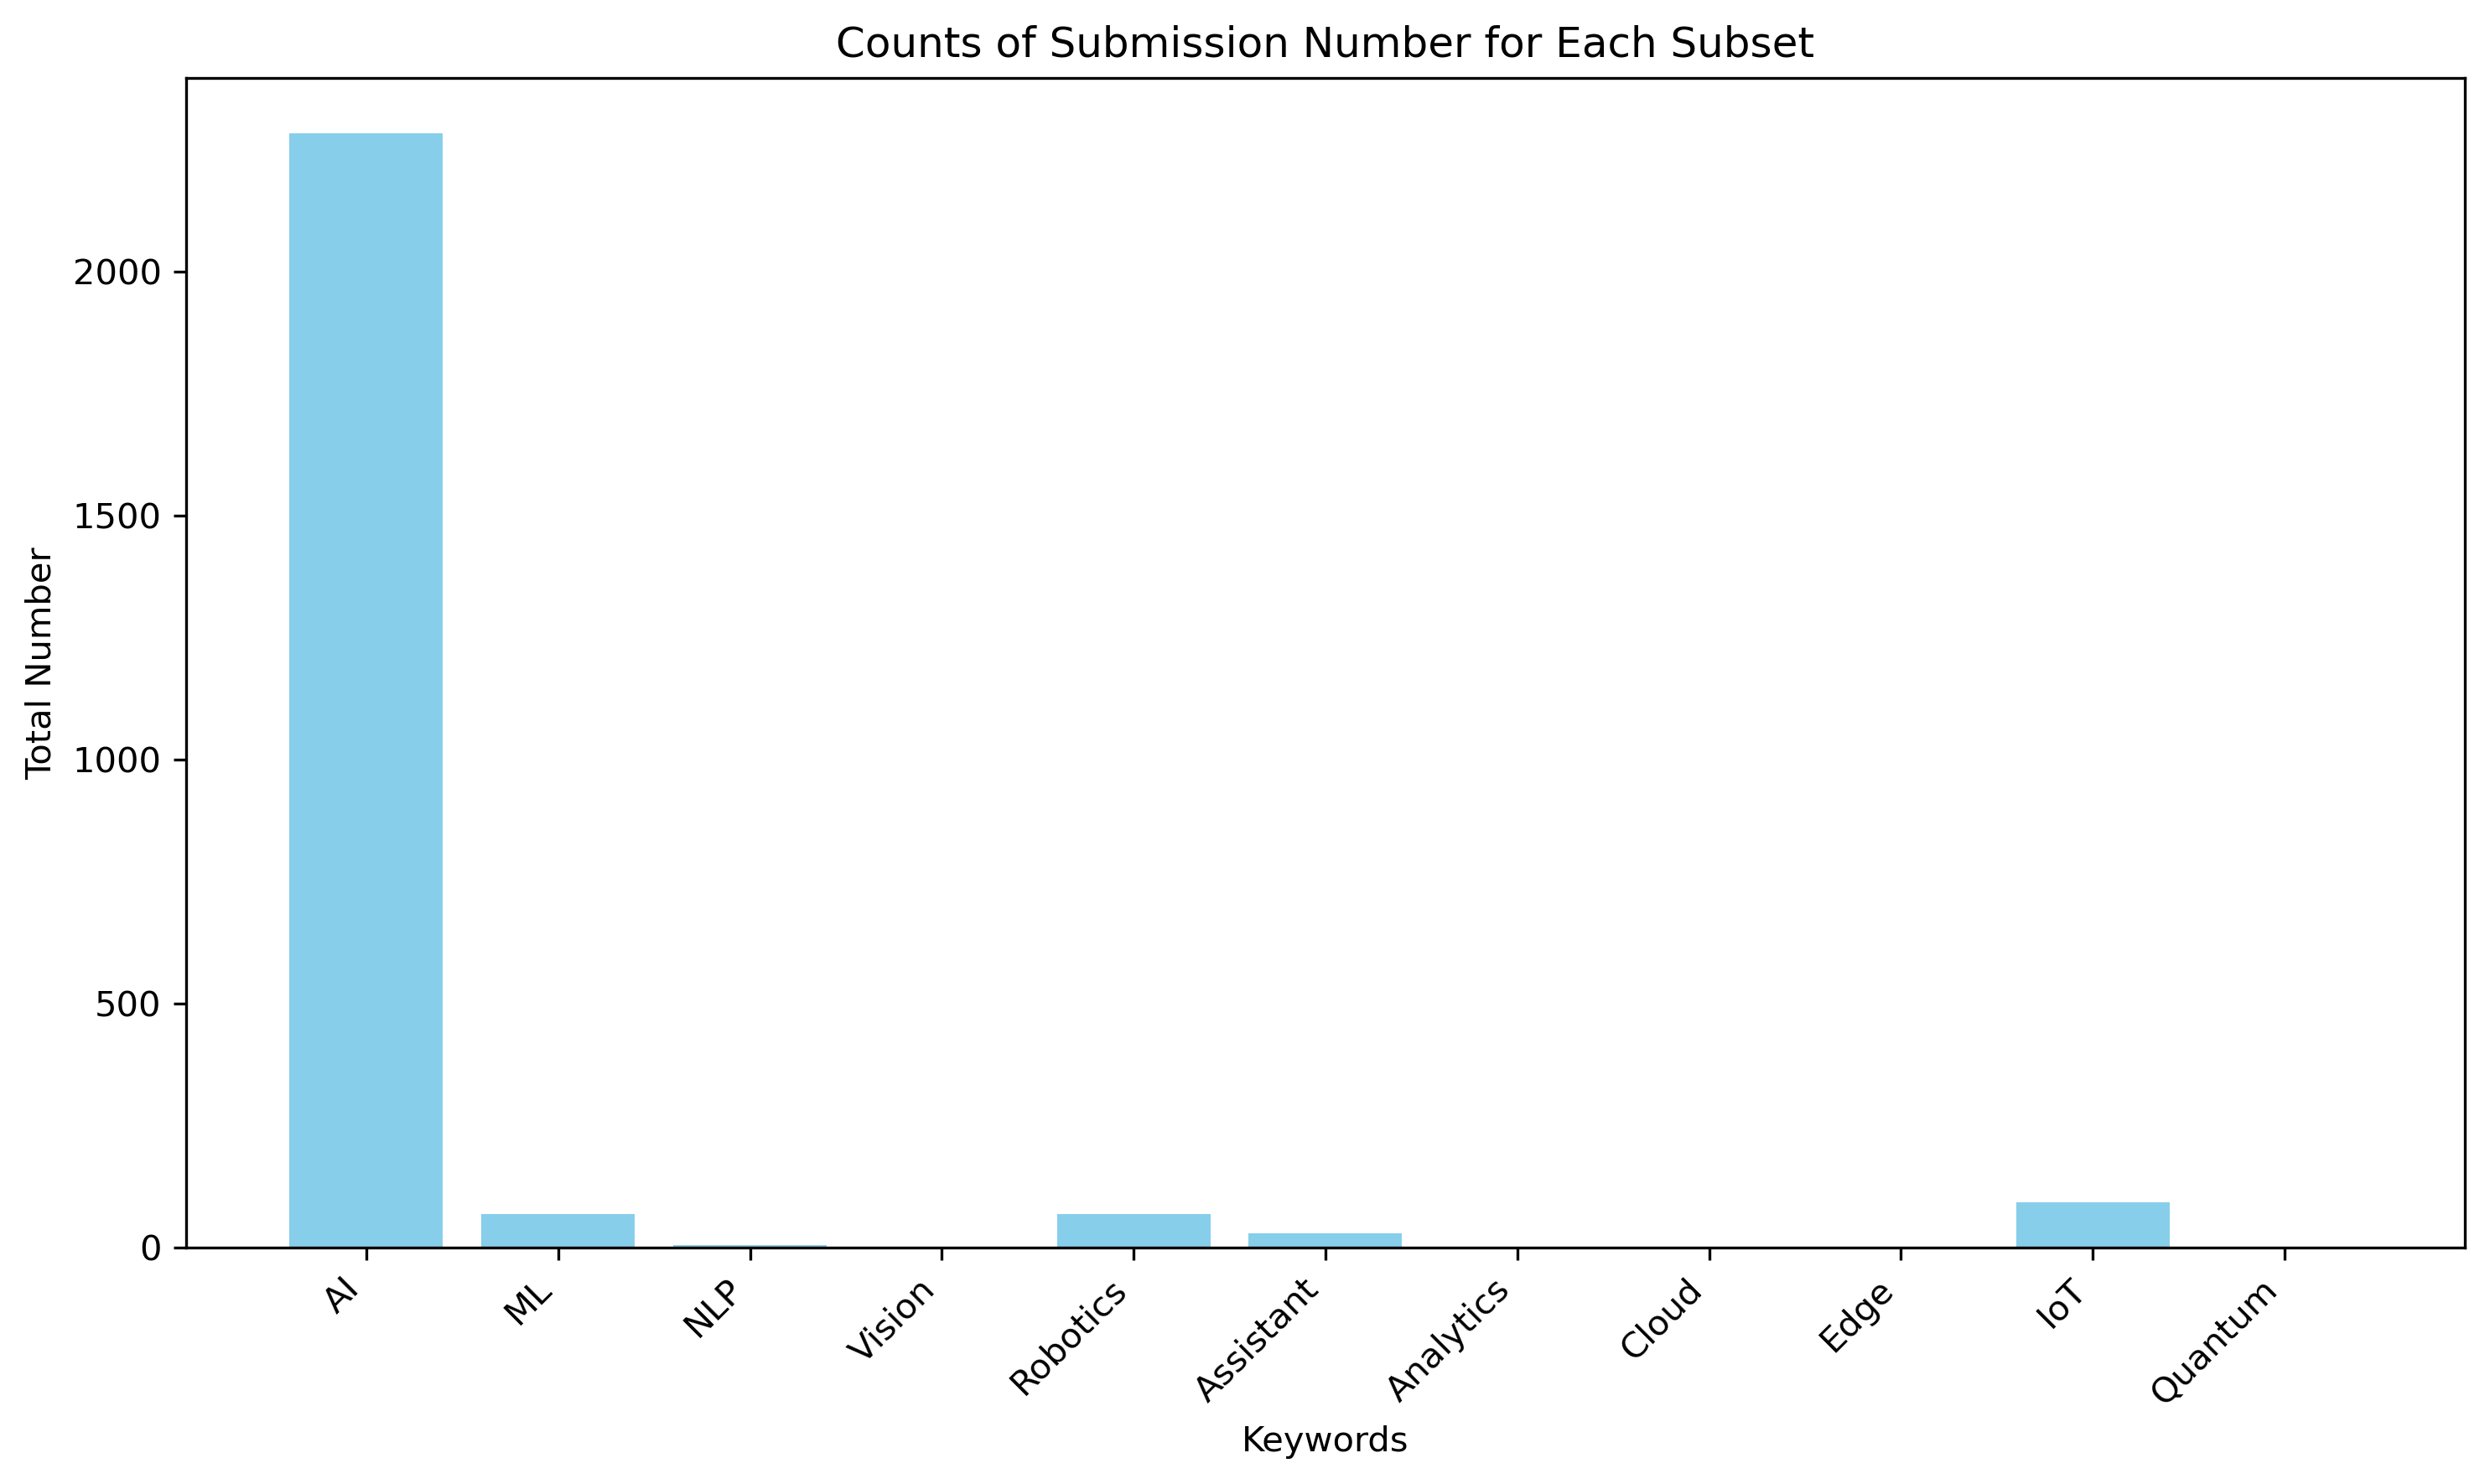

In [24]:
#import matplotlib.pyplot as plt
# Define the counts and corresponding keywords
counts = [2283, 69, 6, 0, 70, 30, 0, 0, 0, 93, 0]  
keywords = ["AI", "ML", "NLP", "Vision", "Robotics", "Assistant", "Analytics", "Cloud", "Edge", "IoT", "Quantum"]
plt.rcParams["figure.dpi"] = 300

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(keywords, counts, color='skyblue')

# Add labels and title
plt.xlabel('Keywords')
plt.ylabel('Total Number')
plt.title('Counts of Submission Number for Each Subset')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

### 5. Analysis of Technology News Coverage Over Time
Following the filtration of news articles within the technology domain using keyword matching, our aim is to examine whether significant events coincide with notable increases in technology news coverage over distinct time periods. This analysis seeks to identify correlations between major tech events and spikes in the number of reported news articles, offering insights into the impact of key developments on media attention within the technology sector.

In [45]:
from pyspark.sql.functions import desc
news_sub_date_count = filtered_news_submissions.groupBy('created_date').agg(count("created_date")\
                                                                         .alias("subs_count")).sort(desc('subs_count'))
news_com_date_count = filtered_news_comments.groupBy('created_date').agg(count("created_date")\
                                                                      .alias("comments_count")).sort(desc('comments_count'))

In [46]:
news_date_count = news_sub_date_count.join(news_com_date_count, "created_date")
news_date_count = news_date_count.na.fill(0)
news_date_df = news_date_count.toPandas()

In [47]:
news_date_df.head()

created_date  subs_count  comments_count
0   2021-04-15          12              63
1   2021-10-23           1              70
2   2021-03-30           4              60
3   2021-03-07           2              27
4   2021-11-19           1              56

In [54]:
news_date_df.to_csv('News_Date.csv',index=False)

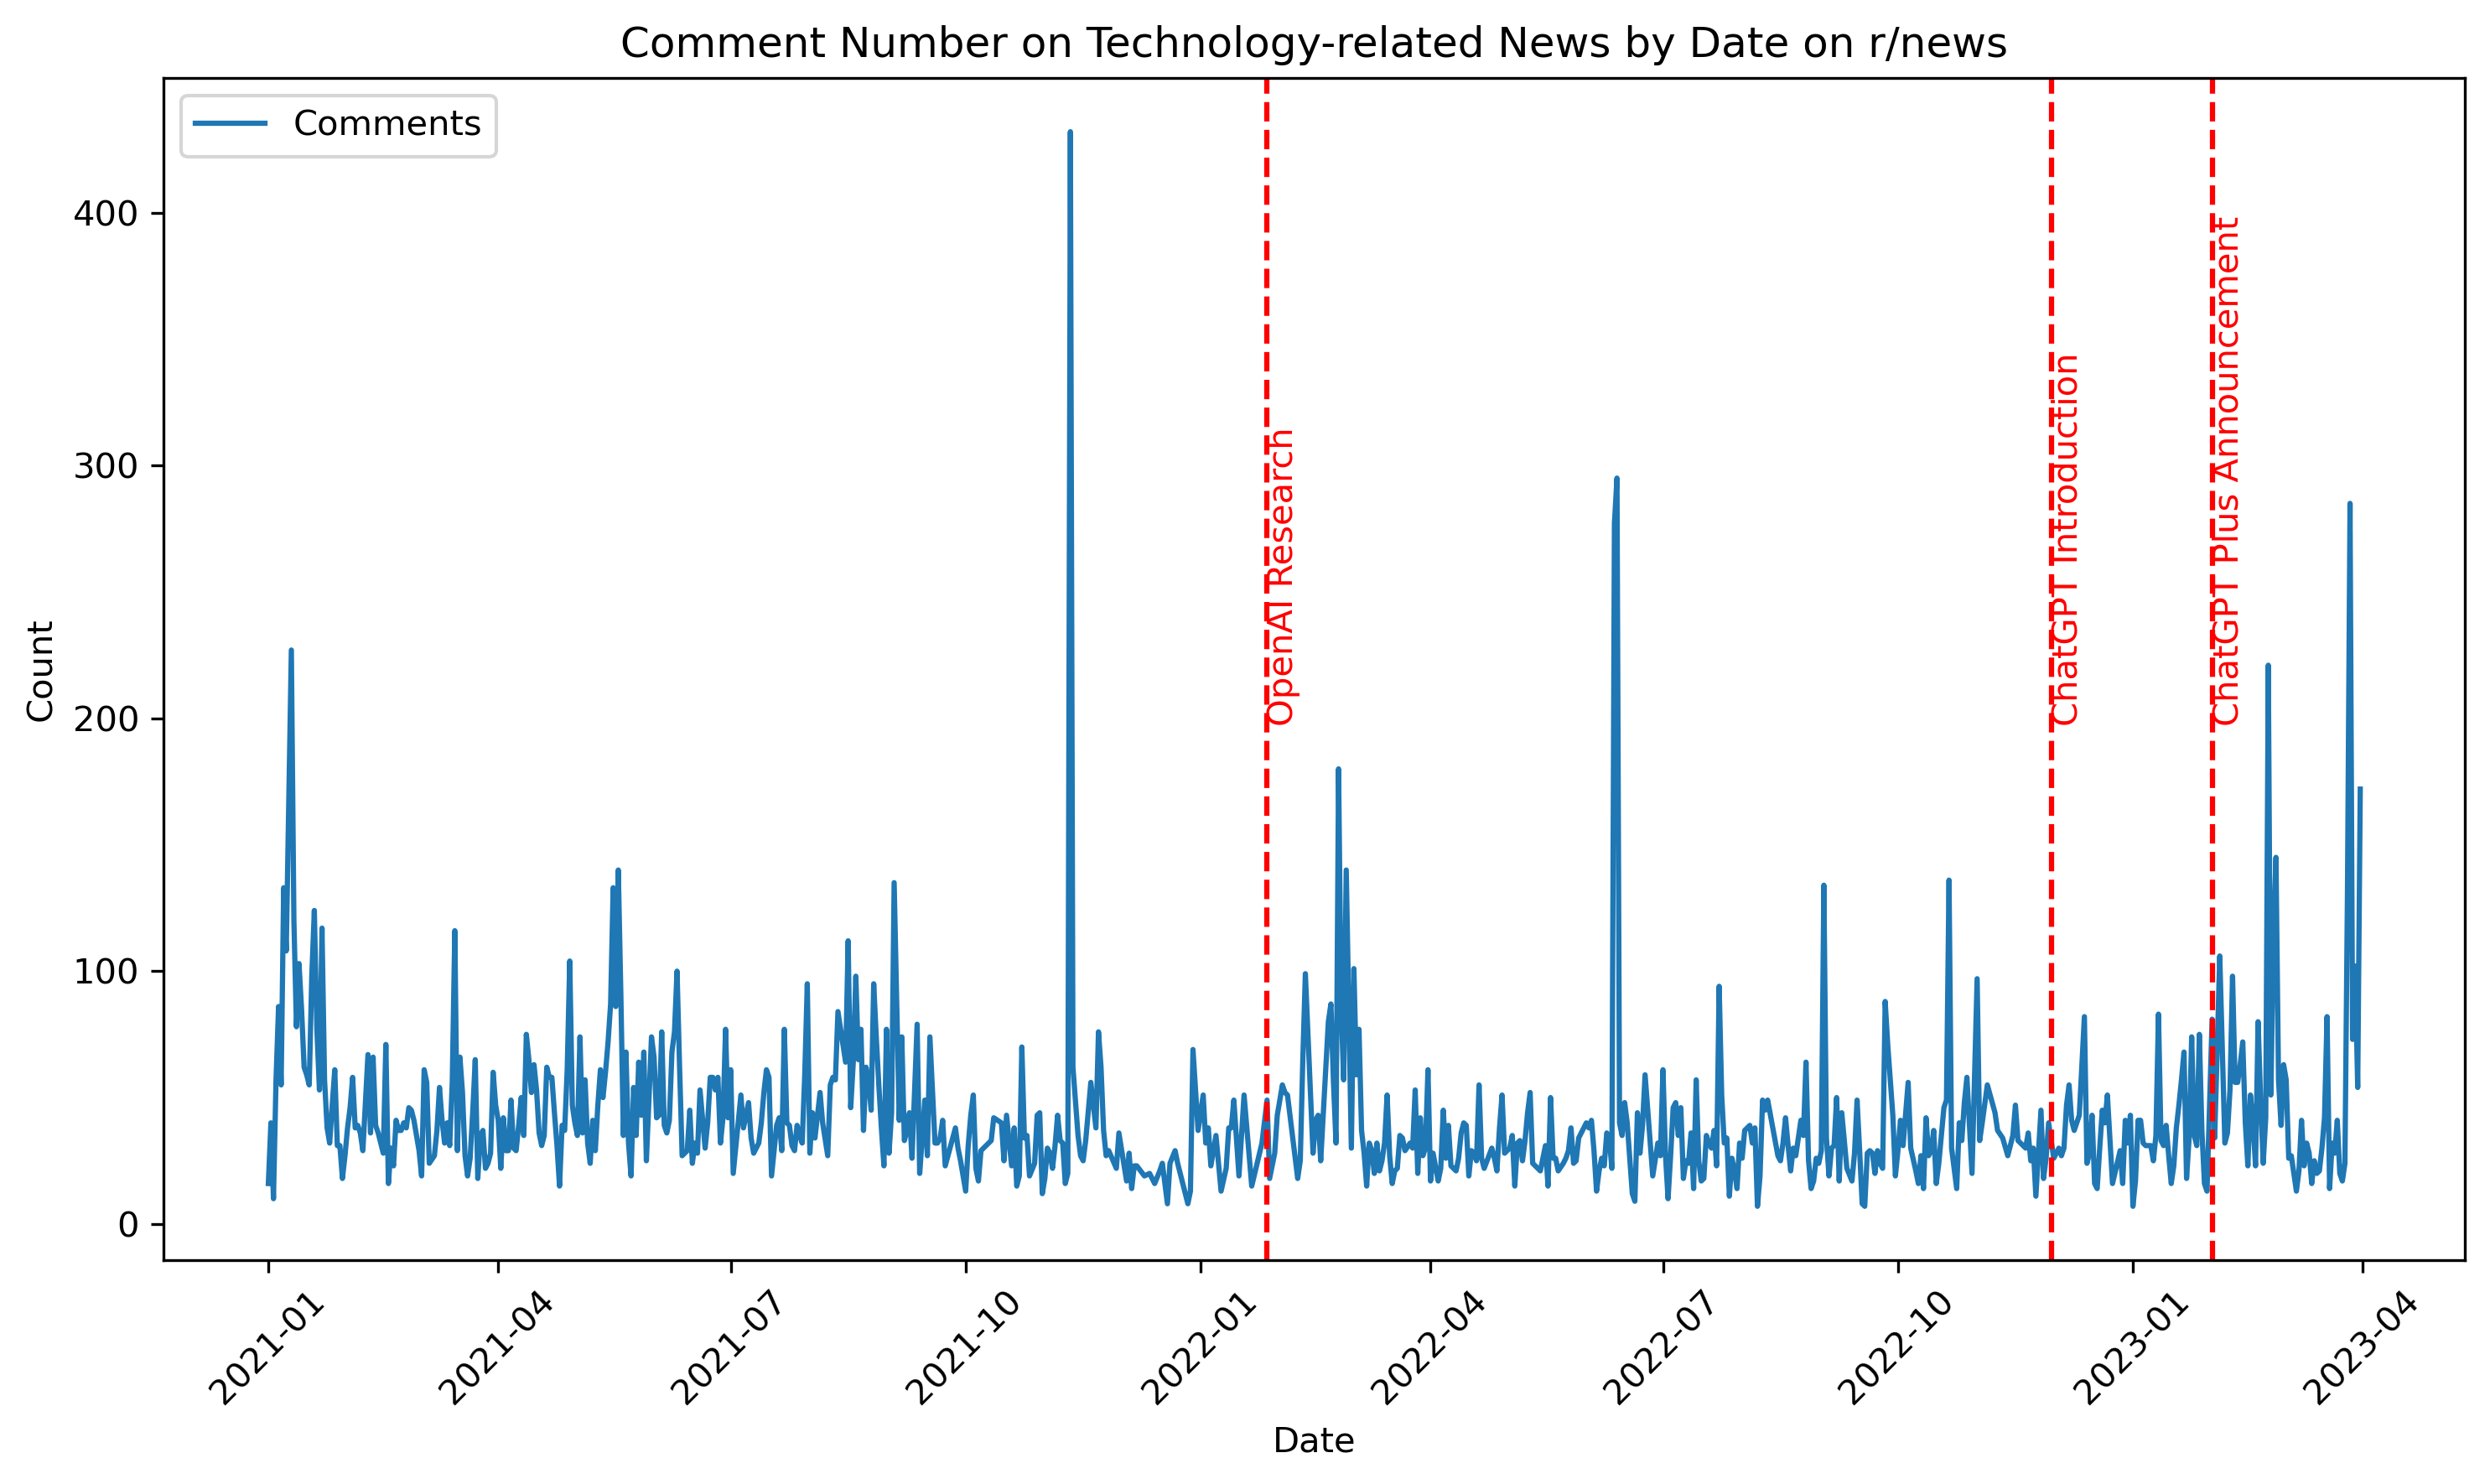

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

news_date_df1 = news_date_df.reset_index()
# Convert 'created_date' column to datetime
news_date_df1['created_date'] = pd.to_datetime(news_date_df1['created_date'])

# Sort the DataFrame by 'created_date' column
news_date_df1 = news_date_df1.sort_values(by='created_date')

plt.figure(figsize=(10, 6))
plt.rcParams["figure.dpi"] = 300

# Plot submissions
#plt.plot(tech_date_df1['created_date'], tech_date_df1['subs_count'], label='Submissions')

# Plot comments
plt.plot(news_date_df1['created_date'], news_date_df1['comments_count'], label='Comments')

# Add vertical lines for significant events
plt.axvline(x=pd.to_datetime('2022-01-27'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-01-27'), 200, "OpenAI Research", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2022-11-30'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-11-30'), 200, "ChatGPT Introduction", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2023-02-01'), color='red', linestyle='--')
plt.text(pd.to_datetime('2023-02-01'), 200, "ChatGPT Plus Announcement", color='red', rotation=90)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comment Number on Technology-related News by Date on r/news')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

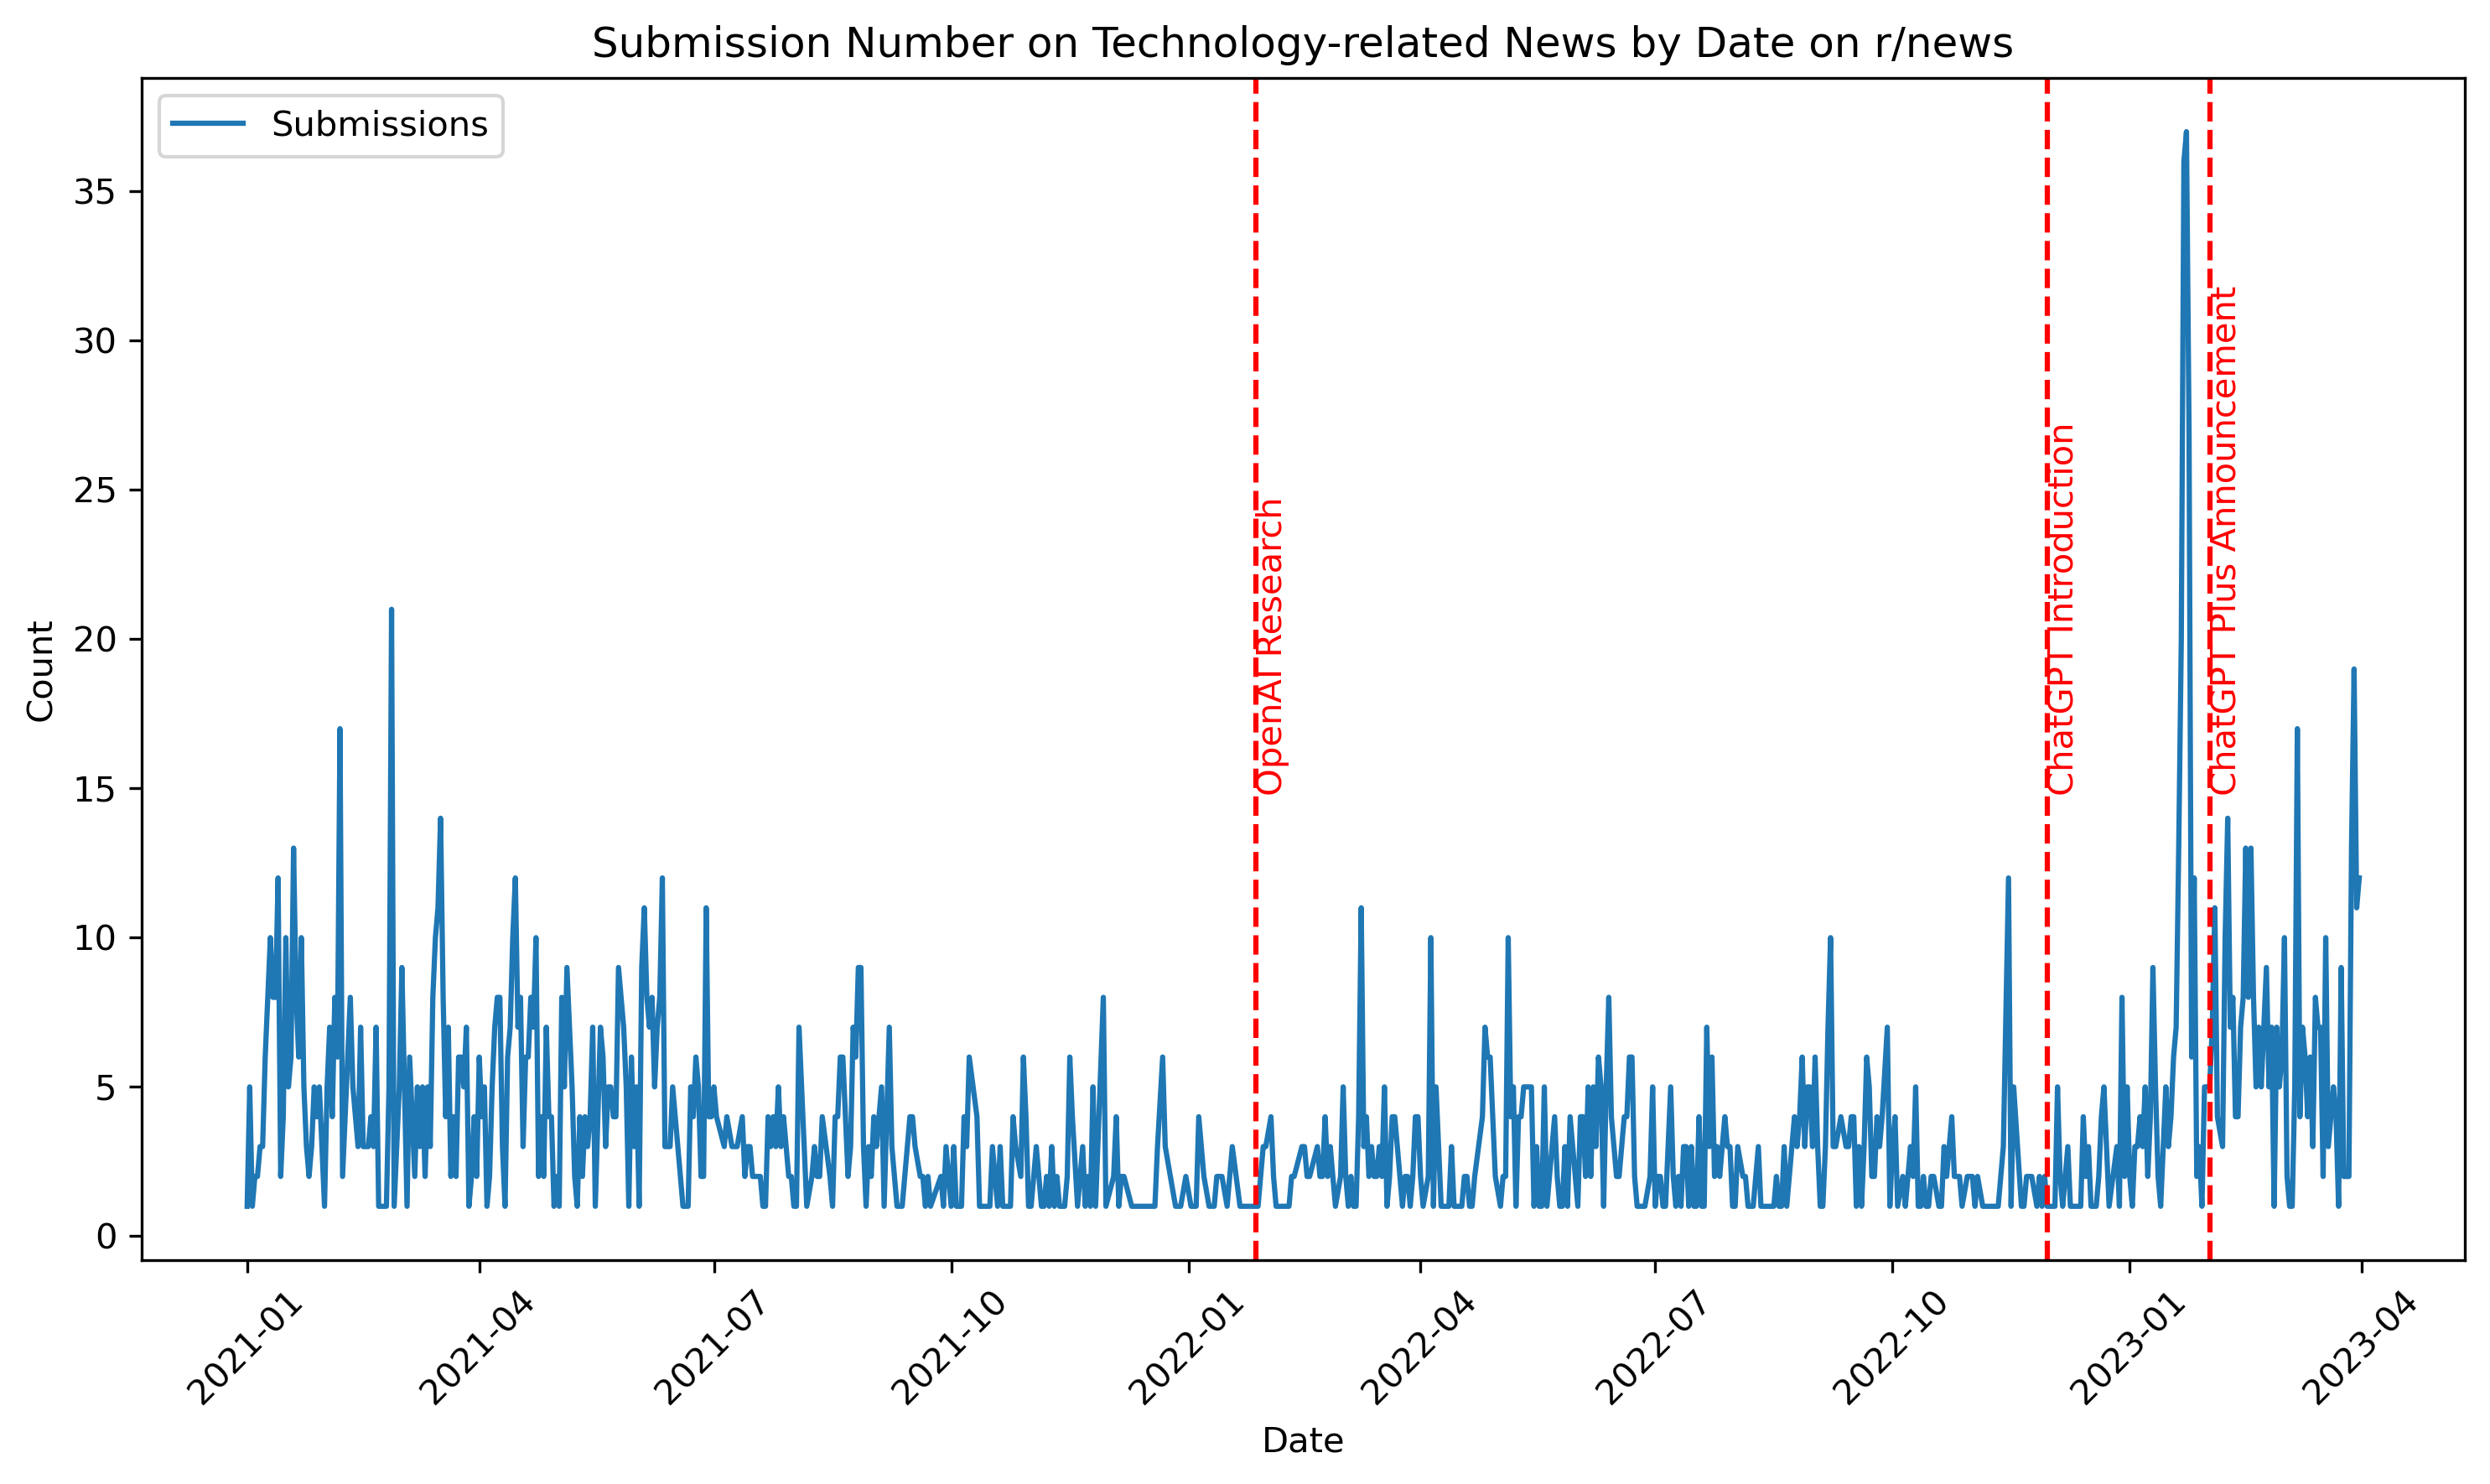

In [53]:
plt.figure(figsize=(10, 6))
plt.rcParams["figure.dpi"] = 300

# Plot submissions
plt.plot(news_date_df1['created_date'], news_date_df1['subs_count'], label='Submissions')

# Plot comments
#plt.plot(news_date_df1['created_date'], news_date_df1['comments_count'], label='Comments')

# Add vertical lines for significant events
plt.axvline(x=pd.to_datetime('2022-01-27'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-01-27'), 15, "OpenAI Research", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2022-11-30'), color='red', linestyle='--')
plt.text(pd.to_datetime('2022-11-30'), 15, "ChatGPT Introduction", color='red', rotation=90)

plt.axvline(x=pd.to_datetime('2023-02-01'), color='red', linestyle='--')
plt.text(pd.to_datetime('2023-02-01'), 15, "ChatGPT Plus Announcement", color='red', rotation=90)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Submission Number on Technology-related News by Date on r/news')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()